In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Processing

In [2]:
df = pd.read_csv('Loan_data.csv', index_col='id', low_memory=False)

In [3]:
df.shape

(42536, 150)

In [4]:
df.sample(10)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
id,,,,,,,,,,,,,,,,,,,,,
1031003,NaN,4000.0,4000.0,4000.00000,36 months,6.03%,121.75,A,A1,AT&T,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
660519,NaN,2500.0,2500.0,2500.00000,36 months,5.42%,75.40,A,A1,C.A.N. Transport,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
632725,NaN,12000.0,12000.0,12000.00000,60 months,8.88%,248.41,B,B1,mannington,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1045354,NaN,14400.0,14400.0,14350.00000,60 months,11.71%,318.22,B,B3,traer joes,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
484627,NaN,18000.0,18000.0,17950.00000,36 months,14.22%,617.12,C,C5,Cembre,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
450131,NaN,6000.0,6000.0,5987.40855,36 months,13.22%,202.81,C,C2,Stored Value Solutions,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1026766,NaN,3175.0,3175.0,3175.00000,36 months,6.03%,96.64,A,A1,WALMART STORES,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
974543,NaN,3100.0,3100.0,3100.00000,36 months,7.51%,96.45,A,A3,"Onondaga Case Management Services, Inc.",...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
620131,NaN,12000.0,12000.0,11900.00000,60 months,16.69%,296.24,E,E3,"DocuSign, Inc.",...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42536 entries, 1077501 to 70686
Columns: 150 entries, member_id to settlement_term
dtypes: float64(120), object(30)
memory usage: 49.0+ MB


In [6]:
#import sys
#!{sys.executable} -m pip install pandas-profiling

In [7]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)

#prof.to_file(output_file='output.html')

In [8]:
#usuwanie kolumn z wartościami constans
df.drop(axis = 1, 
        columns = ['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'chargeoff_within_12_mths', 'hardship_flag', 'disbursement_method',
                  'acc_now_delinq', 'delinq_amnt'],
        inplace= True)

In [9]:
#usuwanie kolumn z brakującymi wartosciami lub kolumnami nieistotnymi (np. url czy opis przeznaczenia pożyczki)
df.drop(axis = 1, 
        columns = ['member_id', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m',
                  'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 
                   'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 
                   'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 
                   'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
                   'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term', 'mths_since_last_delinq',
                   'desc', 'emp_title', 'pub_rec_bankruptcies', 'url', 'title', 'int_rate', 'grade', 'sub_grade', 'verification_status', 'issue_d', 'zip_code', 'purpose', 'addr_state', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'debt_settlement_flag', 'tax_liens'],
        inplace= True)

In [10]:
df.isnull().sum().sort_values()

loan_amnt                     1
last_pymnt_amnt               1
collection_recovery_fee       1
recoveries                    1
total_rec_late_fee            1
total_rec_int                 1
total_rec_prncp               1
total_pymnt_inv               1
total_pymnt                   1
revol_bal                     1
last_fico_range_high          1
fico_range_high               1
last_fico_range_low           1
dti                           1
loan_status                   1
home_ownership                1
installment                   1
term                          1
funded_amnt_inv               1
funded_amnt                   1
fico_range_low                1
annual_inc                    5
earliest_cr_line             30
delinq_2yrs                  30
open_acc                     30
pub_rec                      30
total_acc                    30
inq_last_6mths               30
emp_length                 1113
dtype: int64

In [11]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [12]:
df['emp_length']=df['emp_length'].fillna(df['emp_length'].mode()[0])

In [13]:
#usuwanie wierszy z brakującymi danymi
df.dropna(axis = 0,
          how='any', 
          inplace = True)

In [14]:
df.isnull().sum().sort_values()

loan_amnt                  0
last_pymnt_amnt            0
collection_recovery_fee    0
recoveries                 0
total_rec_late_fee         0
total_rec_int              0
total_rec_prncp            0
total_pymnt_inv            0
total_pymnt                0
total_acc                  0
revol_bal                  0
pub_rec                    0
open_acc                   0
last_fico_range_high       0
inq_last_6mths             0
fico_range_low             0
earliest_cr_line           0
delinq_2yrs                0
dti                        0
loan_status                0
annual_inc                 0
home_ownership             0
emp_length                 0
installment                0
term                       0
funded_amnt_inv            0
funded_amnt                0
fico_range_high            0
last_fico_range_low        0
dtype: int64

<AxesSubplot:ylabel='id'>

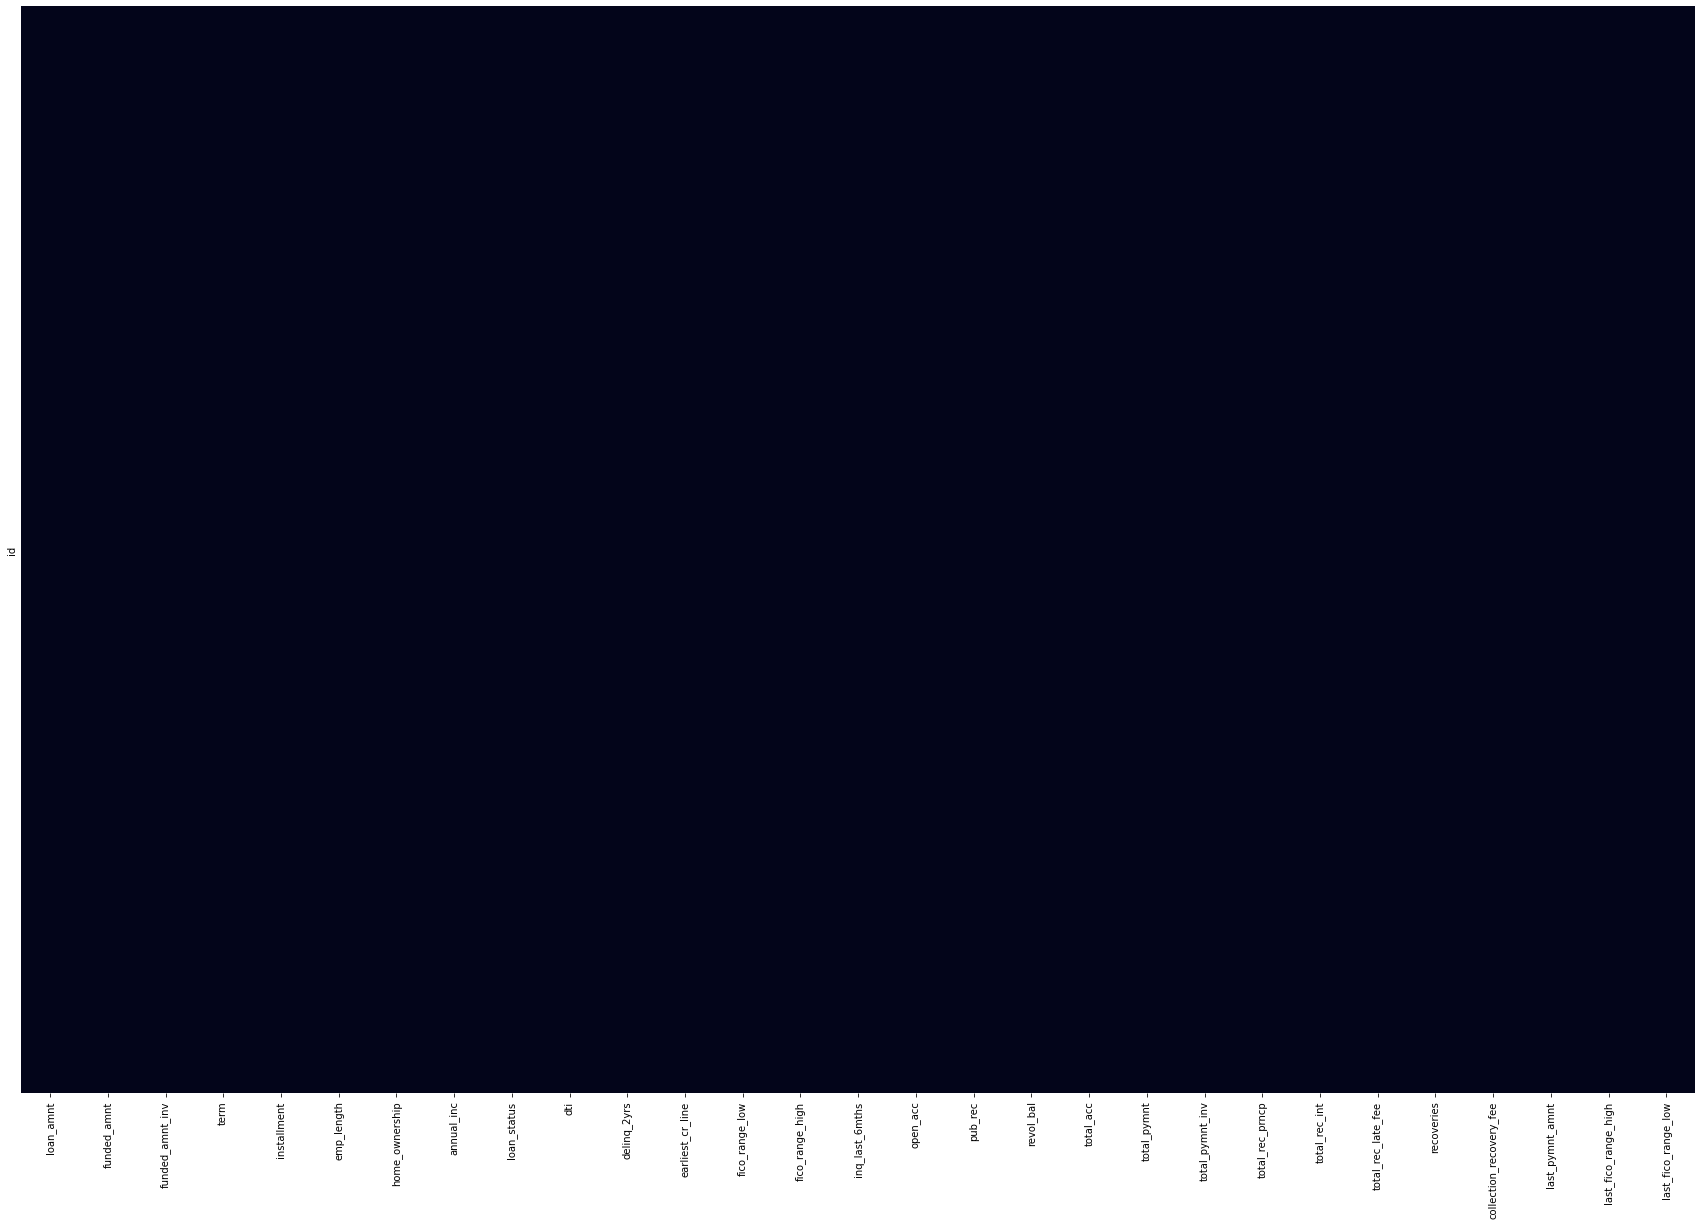

In [15]:
plt.figure(figsize=(30,20))
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [16]:
df.sample(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,installment,emp_length,home_ownership,annual_inc,loan_status,dti,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low
id,,,,,,,,,,,,,,,,,,,,,
807551,3500.0,3500.0,3500.0,36 months,123.90,5 years,RENT,22292.0,Fully Paid,4.74,...,4460.308521,4460.31,3500.00,960.31,0.0,0.00,0.0,131.31,519.0,515.0
672441,5000.0,5000.0,5000.0,36 months,151.64,1 year,MORTGAGE,25040.0,Fully Paid,16.29,...,5153.730434,5153.73,5000.00,153.73,0.0,0.00,0.0,295.43,769.0,765.0
700159,14400.0,14400.0,14350.0,36 months,448.99,3 years,RENT,82000.0,Fully Paid,8.36,...,14932.951193,14881.10,14400.00,532.95,0.0,0.00,0.0,408.60,769.0,765.0
1001953,12000.0,12000.0,12000.0,36 months,386.70,5 years,RENT,58000.0,Fully Paid,6.41,...,13586.261161,13586.26,12000.00,1586.26,0.0,0.00,0.0,5382.30,684.0,680.0
712914,4000.0,4000.0,4000.0,36 months,124.04,7 years,MORTGAGE,35000.0,Charged Off,18.00,...,2976.960000,2976.96,2564.13,407.55,0.0,5.28,0.0,124.04,649.0,645.0


In [17]:
df.shape

(42506, 29)

In [18]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low
count,42506.000000,42506.000000,42506.000000,42506.000000,4.250600e+04,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,...,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000,42506.000000
mean,11094.625465,10826.355691,10146.285141,322.759750,6.913534e+04,13.376882,0.152449,713.044982,717.044982,1.081424,...,12025.466141,11319.806809,9679.811825,2241.191565,1.513534,102.949310,14.350134,2614.892396,689.932410,676.955724
std,7410.835576,7146.772440,7129.794024,208.924211,6.409604e+04,6.725965,0.512406,36.182005,36.182005,1.527455,...,9095.301603,9037.430918,7106.156414,2585.512475,7.809430,735.668541,162.016933,4386.095399,80.748336,119.623888
min,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,614.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5200.000000,5006.250000,4950.000000,165.670000,4.000000e+04,8.200000,0.000000,685.000000,689.000000,0.000000,...,5470.874079,4803.865000,4400.000000,657.852500,0.000000,0.000000,0.000000,211.460000,644.000000,640.000000
50%,9750.000000,9600.000000,8500.000000,277.860000,5.900000e+04,13.480000,0.000000,710.000000,714.000000,1.000000,...,9691.964996,8959.560000,8000.000000,1340.230000,0.000000,0.000000,0.000000,528.960000,699.000000,695.000000
75%,15000.000000,15000.000000,14000.000000,428.500000,8.248500e+04,18.680000,0.000000,740.000000,744.000000,2.000000,...,16433.125311,15546.952500,13500.000000,2804.085000,0.000000,0.000000,0.000000,3172.097500,749.000000,745.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,829.000000,33.000000,...,58886.473429,58563.680000,35000.020000,23886.470000,209.000000,29623.350000,7002.190000,36115.200000,850.000000,845.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42506 entries, 1077501 to 88046
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                42506 non-null  float64
 1   funded_amnt              42506 non-null  float64
 2   funded_amnt_inv          42506 non-null  float64
 3   term                     42506 non-null  object 
 4   installment              42506 non-null  float64
 5   emp_length               42506 non-null  object 
 6   home_ownership           42506 non-null  object 
 7   annual_inc               42506 non-null  float64
 8   loan_status              42506 non-null  object 
 9   dti                      42506 non-null  float64
 10  delinq_2yrs              42506 non-null  float64
 11  earliest_cr_line         42506 non-null  object 
 12  fico_range_low           42506 non-null  float64
 13  fico_range_high          42506 non-null  float64
 14  inq_last_6mths       

In [20]:
#sprawdzanie unikalnych wartości do zmiany typu danych,np:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [21]:
df.open_acc = df.open_acc.astype('float16')
df.last_fico_range_high = df.last_fico_range_high.astype('int32')
df.last_fico_range_low = df.last_fico_range_low.astype('int32')
df.fico_range_low = df.fico_range_low.astype('int32')
df.fico_range_high = df.fico_range_high.astype('int32')
df.pub_rec = df.pub_rec.astype('float16')
df.loan_status = df.loan_status.astype('category')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42506 entries, 1077501 to 88046
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   loan_amnt                42506 non-null  float64 
 1   funded_amnt              42506 non-null  float64 
 2   funded_amnt_inv          42506 non-null  float64 
 3   term                     42506 non-null  object  
 4   installment              42506 non-null  float64 
 5   emp_length               42506 non-null  object  
 6   home_ownership           42506 non-null  object  
 7   annual_inc               42506 non-null  float64 
 8   loan_status              42506 non-null  category
 9   dti                      42506 non-null  float64 
 10  delinq_2yrs              42506 non-null  float64 
 11  earliest_cr_line         42506 non-null  object  
 12  fico_range_low           42506 non-null  int32   
 13  fico_range_high          42506 non-null  int32   
 14  inq_l

In [23]:
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [24]:
dict={'RENT': 1,       
      'OWN': 2,
      'MORTGAGE': 3,
     'OTHER': 4,
     'NONE': 5}

df['home_ownership']= df['home_ownership'].map(dict)
df.home_ownership = df.home_ownership.astype('int16')

In [25]:
dict={'10+ years': '10',       
      '< 1 year': '1',
      '1 year': '1',
     '3 years': '3',
     '8 years': '8',
      '9 years': '9',
     '4 years': '4',
     '5 years': '5',
     '6 years': '6',
     '2 years': '2',
     '7 years': '7'}

df['emp_length']= df['emp_length'].map(dict)
df.emp_length = df.emp_length.astype('int16')

In [26]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [27]:
df['term'], df['month'] = df['term'].str.split(" ", 1).str
df.drop(axis = 1, 
        columns = ['term'],
        inplace= True)

<ipython-input-27-97f39707ccbe>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['term'], df['month'] = df['term'].str.split(" ", 1).str


In [28]:
df['term_months'], df['month'] = df['month'].str.split(" ", 1).str
df.drop(axis = 1, 
        columns = ['month'],
        inplace= True)
df.term_months = df.term_months.astype('int16')

<ipython-input-28-ab393bf64d22>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['term_months'], df['month'] = df['month'].str.split(" ", 1).str


In [29]:
#obliczanie wieku kredytowego,jako czasu od momentu uruchomienia perwszej linii kredytowej, w latach
df.earliest_cr_line.unique()

array(['Jan-1985', 'Apr-1999', 'Nov-2001', 'Feb-1996', 'Jan-1996',
       'Nov-2004', 'Jul-2005', 'Jan-2007', 'Apr-2004', 'Sep-2004',
       'Jan-1998', 'Oct-1989', 'Jul-2003', 'May-1991', 'Sep-2007',
       'Oct-1998', 'Aug-1993', 'Oct-2003', 'Jan-2001', 'Nov-1997',
       'Feb-1983', 'Jul-1985', 'Apr-2003', 'Jun-2001', 'Feb-2002',
       'Aug-1984', 'Nov-2006', 'Dec-1987', 'Nov-1981', 'Feb-1997',
       'Apr-2005', 'Oct-2007', 'Dec-2000', 'Apr-2007', 'Dec-2001',
       'Jan-2003', 'Mar-1994', 'Sep-1998', 'Jun-2004', 'Nov-1995',
       'Jul-1999', 'Jun-1995', 'Sep-1992', 'Jan-2002', 'Apr-1992',
       'Oct-2006', 'May-2000', 'Dec-1998', 'Dec-2004', 'Oct-2000',
       'May-2002', 'May-2006', 'Jul-2002', 'Jul-2006', 'May-1997',
       'Oct-2005', 'Apr-1995', 'Oct-2002', 'Jan-2000', 'Apr-2000',
       'Dec-1994', 'Sep-2005', 'Dec-1984', 'Dec-1999', 'Nov-2003',
       'Jun-1989', 'Jun-2003', 'Oct-1996', 'May-2003', 'Jun-2002',
       'Jun-2007', 'Dec-1996', 'Feb-1984', 'Sep-2002', 'Jan-19

In [30]:
df['earliest_cr_line_month'], df['cr_line_years'] = df['earliest_cr_line'].str.split("-", 1).str
df.drop(axis = 1, 
        columns = ['earliest_cr_line_month'],
        inplace= True)
df.cr_line_years = df.cr_line_years.astype('int64')

<ipython-input-30-1d40d406963f>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  df['earliest_cr_line_month'], df['cr_line_years'] = df['earliest_cr_line'].str.split("-", 1).str


In [31]:
df.drop(axis =1,
       columns= ['earliest_cr_line'],
       inplace= True)

In [32]:
def how_many_years_now(x):
    y = 2021-x
    return y

In [33]:
df.cr_line_years = df.cr_line_years.apply(lambda x: how_many_years_now(x))

C:\Users\iza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Fully Paid                                             34116
Charged Off                                             5670
Does not meet the credit policy. Status:Fully Paid      1962
Does not meet the credit policy. Status:Charged Off      758
Name: loan_status, dtype: int64

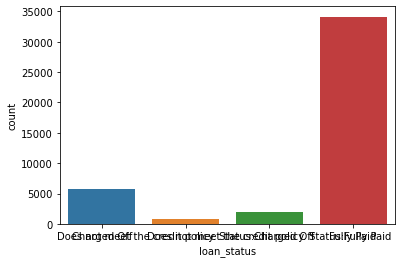

In [34]:
sns.countplot(df['loan_status'])
df.loan_status.value_counts()

In [35]:
# nie bierzemy pod uwagę statusu związanego z nieprzyznaniem kredytu
df_loan = df[(df.loan_status == 'Fully Paid') | (df.loan_status == 'Charged Off')].copy(deep=True)

In [36]:
#zmiana kolumny ze zmienną objaśnianą z typu kategorycznego na target 
dict={'Fully Paid': 1,       
      'Charged Off': 0}

df_loan['loan_status'] = df_loan['loan_status'].map(dict)
df_loan.loan_status = df_loan.loan_status.astype('int16')

C:\Users\iza\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

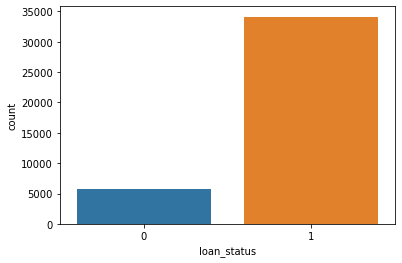

In [37]:
sns.countplot(df_loan['loan_status'])

In [38]:
df_loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'dti',
       'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'term_months', 'cr_line_years'],
      dtype='object')

# EDA

In [39]:
#pip install probscale

In [40]:
from scipy import stats
import seaborn
from matplotlib import pyplot
import probscale

In [41]:
#zakomentowałam wykres w celu optymalizacji wagi pliku- prośba o odkomentowanie :) 
#df_loan.hist(figsize=(15,15))

In [42]:
#zakomentowałam wykres w celu optymalizacji wagi pliku- prośba o odkomentowanie :) 
#sns.pairplot(df_loan, diag_kind='kde')

In [43]:
cor=df_loan.corr()
cor

,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,term_months,cr_line_years
loan_amnt,1.000000,0.981544,0.940160,0.930209,0.135490,0.171545,0.271340,-0.050035,0.067136,-0.031484,...,0.853950,0.729176,0.048928,0.136772,0.076158,0.448642,0.074397,0.069390,0.362123,0.186807
funded_amnt,0.981544,1.000000,0.958568,0.956108,0.135122,0.165963,0.267130,-0.047299,0.067035,-0.031948,...,0.872116,0.736798,0.051051,0.137900,0.078196,0.453141,0.074524,0.069221,0.341611,0.180063
funded_amnt_inv,0.940160,0.958568,1.000000,0.905101,0.147733,0.161825,0.254536,-0.028681,0.075434,-0.038069,...,0.848485,0.730504,0.031971,0.124786,0.063270,0.442636,0.079486,0.075735,0.361885,0.165358
installment,0.930209,0.956108,0.905101,1.000000,0.105808,0.134614,0.271119,-0.023566,0.054730,-0.019309,...,0.848972,0.633483,0.059471,0.119078,0.077797,0.401957,0.073693,0.068298,0.102976,0.162749
emp_length,0.135490,0.135122,0.147733,0.105808,1.000000,0.250594,0.094378,-0.020793,0.047343,0.013860,...,0.112374,0.111978,-0.017162,0.024062,0.006995,0.067706,0.014546,0.017421,0.107277,0.295700
home_ownership,0.171545,0.165963,0.161825,0.134614,0.250594,1.000000,0.192201,0.024157,-0.023414,0.020240,...,0.155780,0.109583,-0.018428,0.018024,0.009033,0.103822,0.092637,0.088106,0.102721,0.269163
annual_inc,0.271340,0.267130,0.254536,0.271119,0.094378,0.192201,1.000000,0.041168,-0.122537,0.022985,...,0.258871,0.185169,0.006801,0.023216,0.017234,0.140584,0.068048,0.060930,0.046809,0.180846
loan_status,-0.050035,-0.047299,-0.028681,-0.023566,-0.020793,0.024157,0.041168,1.000000,-0.041984,-0.020197,...,0.331227,0.005747,-0.160817,-0.339993,-0.209308,0.215818,0.451416,0.414690,-0.149151,0.022403
dti,0.067136,0.067035,0.075434,0.054730,0.047343,-0.023414,-0.122537,-0.041984,1.000000,-0.034562,...,0.043607,0.106689,-0.010056,0.025283,0.011815,0.005344,-0.056534,-0.029551,0.082822,0.042921
delinq_2yrs,-0.031484,-0.031948,-0.038069,-0.019309,0.013860,0.020240,0.022985,-0.020197,-0.034562,1.000000,...,-0.038247,0.023506,0.032466,0.013358,0.014791,-0.012125,-0.078096,-0.051469,0.006405,0.065422


In [44]:
#zakomentowałam wykres w celu optymalizacji wagi pliku- prośba o odkomentowanie :) 
#plt.figure(figsize=(22,10))
#sns.heatmap(df_loan[df_loan['loan_status']==1].corr(),cmap='Blues',annot=True)
#plt.title('Loan fully paid correlation heatmap')

### Zmienna FICO (last_FICO_range_high)

In [45]:
print('Range of values: ', df_loan['last_fico_range_high'].max()-df_loan['last_fico_range_high'].min())

Range of values:  850


In [46]:
print('Minimum last_FICO_range_high: ', df_loan['last_fico_range_high'].min())
print('Maximum last_FICO_range_high: ',df_loan['last_fico_range_high'].max())
print('Mean value: ', df_loan['last_fico_range_high'].mean())
print('Median value: ',df_loan['last_fico_range_high'].median())
print('Standard deviation: ', df_loan['last_fico_range_high'].std())
print('Null values: ',df_loan['last_fico_range_high'].isnull().any())

Minimum last_FICO_range_high:  0
Maximum last_FICO_range_high:  850
Mean value:  692.1354245211884
Median value:  704.0
Standard deviation:  80.34507460018561
Null values:  False


In [47]:
Q1=df_loan['last_fico_range_high'].quantile(q=0.25)
Q3=df_loan['last_fico_range_high'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df_loan['last_fico_range_high']))

1st Quartile (Q1) is:  644.0
3st Quartile (Q3) is:  749.0
Interquartile range (IQR) is  105.0


In [48]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in FICO: ', L_outliers)
print('Upper outliers in FICO: ', U_outliers)

Lower outliers in FICO:  486.5
Upper outliers in FICO:  906.5


In [49]:
print('Number of outliers in last_FICO_range_high upper : ', df_loan[df_loan['last_fico_range_high']>906.5]['last_fico_range_high'].count())
print('Number of outliers in last_FICO_range_high lower : ', df_loan[df_loan['last_fico_range_high']<486.5]['last_fico_range_high'].count())
print('% of Outlier in last_FICO_range_high upper: ',round(df_loan[df_loan['last_fico_range_high']>906.5]['last_fico_range_high'].count()*100/len(df_loan)), '%')
print('% of Outlier in last_FICO_range_high lower: ',round(df_loan[df_loan['last_fico_range_high']<486.5]['last_fico_range_high'].count()*100/len(df_loan)), '%')

Number of outliers in last_FICO_range_high upper :  0
Number of outliers in last_FICO_range_high lower :  21
% of Outlier in last_FICO_range_high upper:  0 %
% of Outlier in last_FICO_range_high lower:  0 %


C:\Users\iza\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


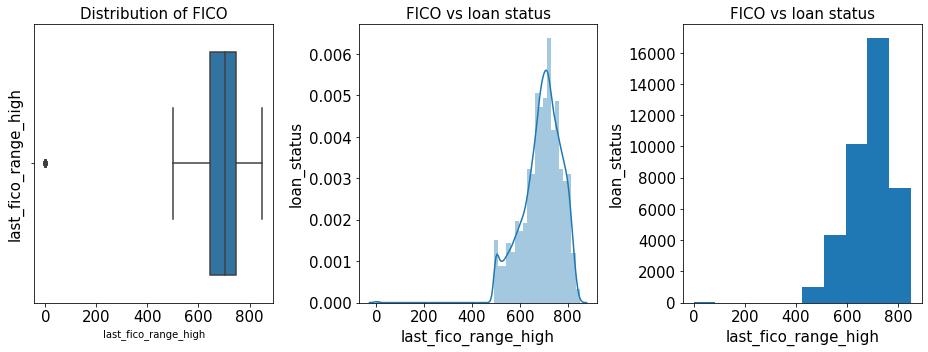

In [50]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

sns.boxplot(x='last_fico_range_high',data=df_loan,orient='v',ax=ax1)
ax1.set_ylabel('last_fico_range_high', fontsize=15)
ax1.set_title('Distribution of FICO', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_loan['last_fico_range_high'],ax=ax2)
ax2.set_xlabel('last_fico_range_high', fontsize=15)
ax2.set_ylabel('loan_status', fontsize=15)
ax2.set_title('FICO vs loan status', fontsize=15)
ax2.tick_params(labelsize=15)

ax3.hist(df_loan['last_fico_range_high'])
ax3.set_xlabel('last_fico_range_high', fontsize=15)
ax3.set_ylabel('loan_status', fontsize=15)
ax3.set_title('FICO vs loan status', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


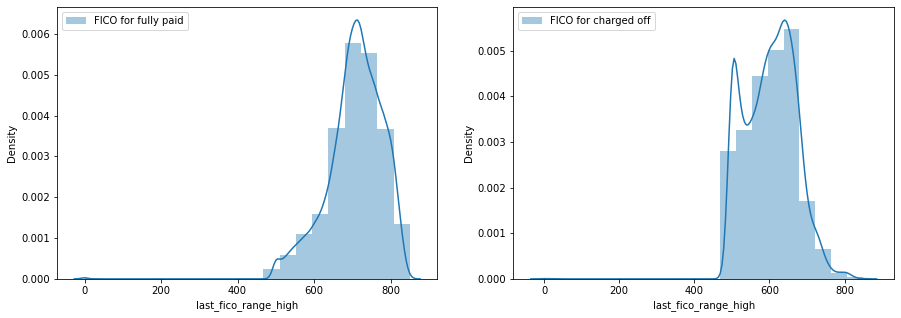

In [51]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df_loan[(df_loan['loan_status']==1)]['last_fico_range_high'],label='FICO for fully paid', bins=20)
plt.legend()
plt.subplot(1,2,2)
sns.distplot(df_loan[(df_loan['loan_status']==0)]['last_fico_range_high'],label='FICO for charged off', bins=20)
plt.legend()

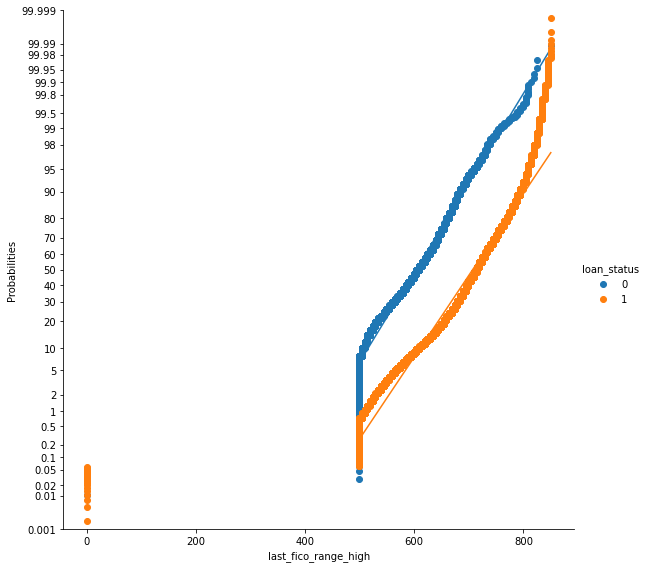

In [52]:
fg = (sns.FacetGrid(df_loan, hue='loan_status', height=8)
        .map(probscale.probplot, 'last_fico_range_high', probax='y', bestfit=True)
        .set_ylabels('Probabilities')
        .add_legend())

Im wyższy wskaźnik FICO tym prawdpodobieństwo spłacenia pożyczki jest większe. Dla kredytobiorców z FICO powyżej 820 prawdopodobieństwo spłaty jest wyższe niż niewypłacalności. 

In [53]:
#zakomentowałam wykres w celu optymalizacji wagi pliku- prośba o odkomentowanie :) 
#plt.figure(figsize=(22,10))
#sns.heatmap(df_loan[df_loan['loan_status']==0].corr(),cmap='Blues',annot=True)
#plt.title('Loan charged off correlation heatmap')

### Zmienna wiek kredytowy (cr_line_years)

In [54]:
print('Range of values: ', df_loan['cr_line_years'].max()-df_loan['cr_line_years'].min())

Range of values:  62


In [55]:
print('Minimum cr_line_years: ', df_loan['cr_line_years'].min())
print('Maximum cr_line_years: ',df_loan['cr_line_years'].max())
print('Mean value: ', df_loan['cr_line_years'].mean())
print('Median value: ',df_loan['cr_line_years'].median())
print('Standard deviation: ', df_loan['cr_line_years'].std())
print('Null values: ',df_loan['cr_line_years'].isnull().any())

Minimum cr_line_years:  13
Maximum cr_line_years:  75
Mean value:  24.440732921128035
Median value:  23.0
Standard deviation:  6.826293612553389
Null values:  False


In [56]:
Q1=df_loan['cr_line_years'].quantile(q=0.25)
Q3=df_loan['cr_line_years'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df_loan['cr_line_years']))

1st Quartile (Q1) is:  20.0
3st Quartile (Q3) is:  28.0
Interquartile range (IQR) is  8.0


In [57]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cr_line_years: ', L_outliers)
print('Upper outliers in cr_line_years: ', U_outliers)

Lower outliers in cr_line_years:  8.0
Upper outliers in cr_line_years:  40.0


In [58]:
print('Number of outliers in cr_line_years upper : ', df_loan[df_loan['cr_line_years']>40.0]['cr_line_years'].count())
print('Number of outliers in cr_line_years lower : ', df_loan[df_loan['cr_line_years']<8.0]['cr_line_years'].count())
print('% of Outlier in cr_line_years upper: ',round(df_loan[df_loan['cr_line_years']>40.0]['cr_line_years'].count()*100/len(df_loan)), '%')
print('% of Outlier in cr_line_years lower: ',round(df_loan[df_loan['cr_line_years']<8.0]['cr_line_years'].count()*100/len(df_loan)), '%')

Number of outliers in cr_line_years upper :  1210
Number of outliers in cr_line_years lower :  0
% of Outlier in cr_line_years upper:  3 %
% of Outlier in cr_line_years lower:  0 %


C:\Users\iza\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


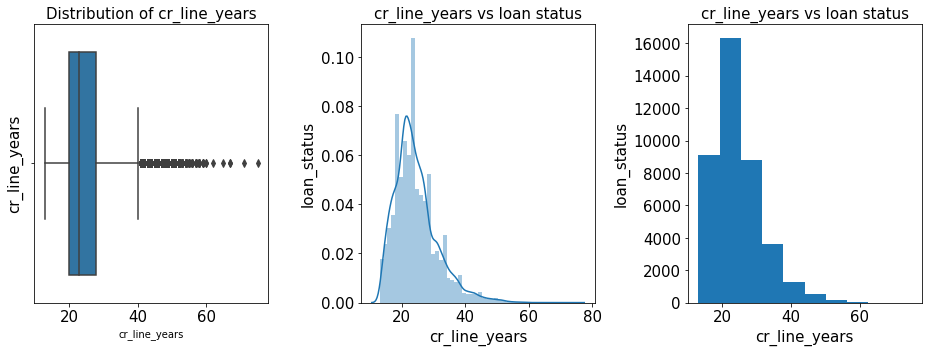

In [59]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

sns.boxplot(x='cr_line_years',data=df_loan,orient='v',ax=ax1)
ax1.set_ylabel('cr_line_years', fontsize=15)
ax1.set_title('Distribution of cr_line_years', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_loan['cr_line_years'],ax=ax2)
ax2.set_xlabel('cr_line_years', fontsize=15)
ax2.set_ylabel('loan_status', fontsize=15)
ax2.set_title('cr_line_years vs loan status', fontsize=15)
ax2.tick_params(labelsize=15)

ax3.hist(df_loan['cr_line_years'])
ax3.set_xlabel('cr_line_years', fontsize=15)
ax3.set_ylabel('loan_status', fontsize=15)
ax3.set_title('cr_line_years vs loan status', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


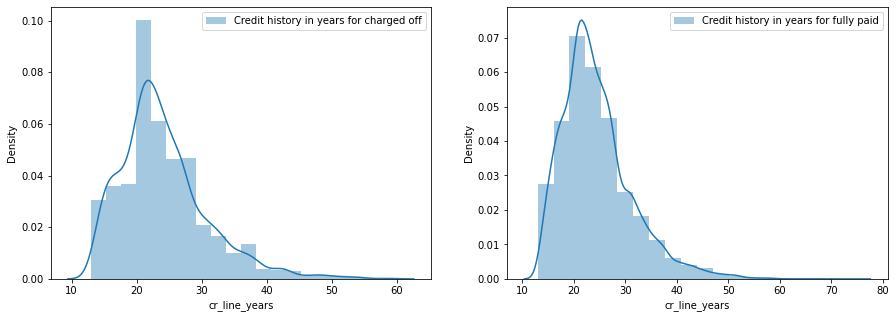

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df_loan[(df_loan['loan_status']==0)]['cr_line_years'],label='Credit history in years for charged off', bins=20)
plt.legend()
plt.subplot(1,2,2)
sns.distplot(df_loan[(df_loan['loan_status']==1)]['cr_line_years'],label='Credit history in years for fully paid', bins=20)
plt.legend()

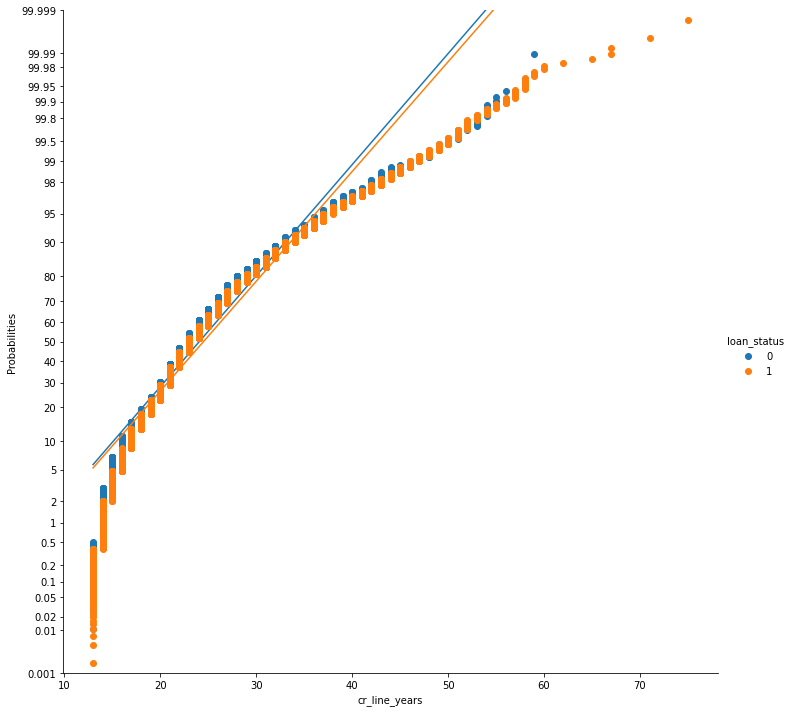

In [61]:
fg = (sns.FacetGrid(df_loan, hue='loan_status', height=10)
        .map(probscale.probplot, 'cr_line_years', probax='y', bestfit=True)
        .set_ylabels('Probabilities')
        .add_legend())

Prawdopodobieństwo spłaty pożyczki i niewypłacalności w zależości od wieku kredytowego jest podobne (nieznacznie wzrasta prawdopodobieństwo niewypłacalności im ten wiek jest wyższy).
Niska jest korelacja wieku kredytowego ze wskaźnikiem FICO.

### Zmienna status kredytu hipotecznego (home_ownership)

In [62]:
print('Range of values: ', df_loan['home_ownership'].max()-df_loan['home_ownership'].min())

Range of values:  4


In [63]:
print('Minimum home_ownership: ', df_loan['home_ownership'].min())
print('Maximum home_ownership: ',df_loan['home_ownership'].max())
print('Mean value: ', df_loan['home_ownership'].mean())
print('Median value: ',df_loan['home_ownership'].median())
print('Standard deviation: ', df_loan['home_ownership'].std())
print('Null values: ',df_loan['home_ownership'].isnull().any())

Minimum home_ownership:  1
Maximum home_ownership:  5
Mean value:  1.9746141858945359
Median value:  2.0
Standard deviation:  0.9645515494445293
Null values:  False


In [64]:
Q1=df_loan['home_ownership'].quantile(q=0.25)
Q3=df_loan['home_ownership'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df_loan['home_ownership']))

1st Quartile (Q1) is:  1.0
3st Quartile (Q3) is:  3.0
Interquartile range (IQR) is  2.0


In [65]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in home_ownership: ', L_outliers)
print('Upper outliers in home_ownership: ', U_outliers)

Lower outliers in home_ownership:  -2.0
Upper outliers in home_ownership:  6.0


In [66]:
print('Number of outliers in home_ownership upper : ', df_loan[df_loan['home_ownership']>6.0]['home_ownership'].count())
print('Number of outliers in home_ownership lower : ', df_loan[df_loan['home_ownership']<-2.0]['home_ownership'].count())
print('% of Outlier in home_ownership upper: ',round(df_loan[df_loan['home_ownership']>6.0]['home_ownership'].count()*100/len(df_loan)), '%')
print('% of Outlier in home_ownership lower: ',round(df_loan[df_loan['home_ownership']<-2.0]['home_ownership'].count()*100/len(df_loan)), '%')

Number of outliers in home_ownership upper :  0
Number of outliers in home_ownership lower :  0
% of Outlier in home_ownership upper:  0 %
% of Outlier in home_ownership lower:  0 %


C:\Users\iza\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


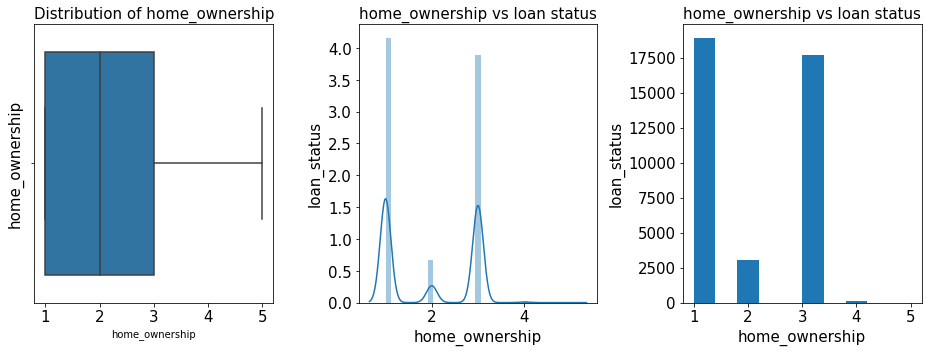

In [67]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

sns.boxplot(x='home_ownership',data=df_loan,orient='v',ax=ax1)
ax1.set_ylabel('home_ownership', fontsize=15)
ax1.set_title('Distribution of home_ownership', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_loan['home_ownership'],ax=ax2)
ax2.set_xlabel('home_ownership', fontsize=15)
ax2.set_ylabel('loan_status', fontsize=15)
ax2.set_title('home_ownership vs loan status', fontsize=15)
ax2.tick_params(labelsize=15)

ax3.hist(df_loan['home_ownership'])
ax3.set_xlabel('home_ownership', fontsize=15)
ax3.set_ylabel('loan_status', fontsize=15)
ax3.set_title('home_ownership vs loan status', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


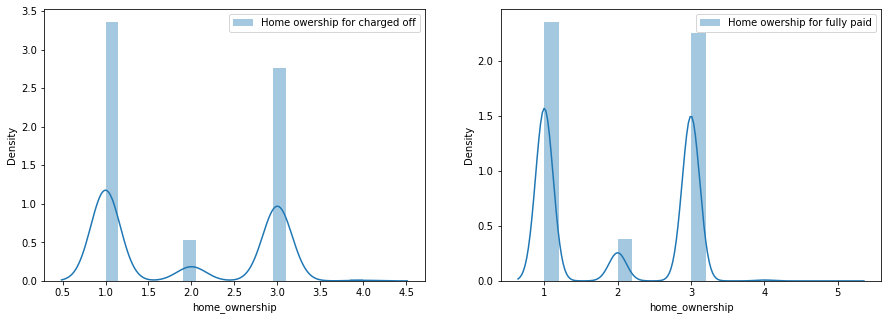

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df_loan[(df_loan['loan_status']==0)]['home_ownership'],label='Home owership for charged off', bins=20)
plt.legend()
plt.subplot(1,2,2)
sns.distplot(df_loan[(df_loan['loan_status']==1)]['home_ownership'],label='Home owership for fully paid', bins=20)
plt.legend()

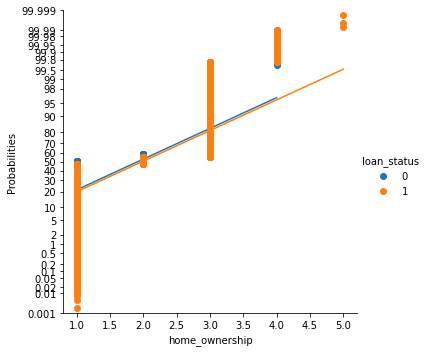

In [69]:
fg = (sns.FacetGrid(df_loan, hue='loan_status', height=5)
        .map(probscale.probplot, 'home_ownership', probax='y', bestfit=True)
        .set_ylabels('Probabilities')
        .add_legend())

Największe prawdopodobieństwo niewypłacalności jest w przypadku wynajmujących oraz posiadajacych hipotekę. Prawdopodobieństwo spłaty jest najwyższe dla właścicieli lokum.

### Zmienna roczne przychody (annual_inc)

In [70]:
print('Range of values: ', df_loan['annual_inc'].max()-df_loan['annual_inc'].min())

Range of values:  5996000.0


In [71]:
print('Minimum annual_inc: ', df_loan['annual_inc'].min())
print('Maximum annual_inc: ',df_loan['annual_inc'].max())
print('Mean value: ', df_loan['annual_inc'].mean())
print('Median value: ',df_loan['annual_inc'].median())
print('Standard deviation: ', df_loan['annual_inc'].std())
print('Null values: ',df_loan['annual_inc'].isnull().any())

Minimum annual_inc:  4000.0
Maximum annual_inc:  6000000.0
Mean value:  68979.06675514005
Median value:  59000.0
Standard deviation:  63762.63452002033
Null values:  False


In [72]:
Q1=df_loan['annual_inc'].quantile(q=0.25)
Q3=df_loan['annual_inc'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df_loan['annual_inc']))

1st Quartile (Q1) is:  40500.0
3st Quartile (Q3) is:  82342.5
Interquartile range (IQR) is  41842.5


In [73]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in annual_inc: ', L_outliers)
print('Upper outliers in annual_inc: ', U_outliers)

Lower outliers in annual_inc:  -22263.75
Upper outliers in annual_inc:  145106.25


In [74]:
print('Number of outliers in annual_inc upper : ', df_loan[df_loan['annual_inc']>145106.25]['annual_inc'].count())
print('Number of outliers in annual_inc lower : ', df_loan[df_loan['annual_inc']<-22263.75]['annual_inc'].count())
print('% of Outlier in annual_inc upper: ',round(df_loan[df_loan['annual_inc']>145106.25]['annual_inc'].count()*100/len(df_loan)), '%')
print('% of Outlier in annual_inc lower: ',round(df_loan[df_loan['annual_inc']<-22263.75]['annual_inc'].count()*100/len(df_loan)), '%')

Number of outliers in annual_inc upper :  1848
Number of outliers in annual_inc lower :  0
% of Outlier in annual_inc upper:  5 %
% of Outlier in annual_inc lower:  0 %


C:\Users\iza\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


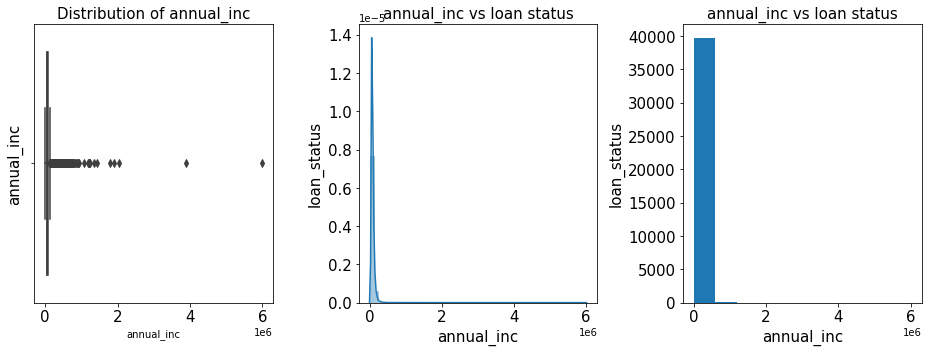

In [75]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

sns.boxplot(x='annual_inc',data=df_loan,orient='v',ax=ax1)
ax1.set_ylabel('annual_inc', fontsize=15)
ax1.set_title('Distribution of annual_inc', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_loan['annual_inc'],ax=ax2)
ax2.set_xlabel('annual_inc', fontsize=15)
ax2.set_ylabel('loan_status', fontsize=15)
ax2.set_title('annual_inc vs loan status', fontsize=15)
ax2.tick_params(labelsize=15)

ax3.hist(df_loan['annual_inc'])
ax3.set_xlabel('annual_inc', fontsize=15)
ax3.set_ylabel('loan_status', fontsize=15)
ax3.set_title('annual_inc vs loan status', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


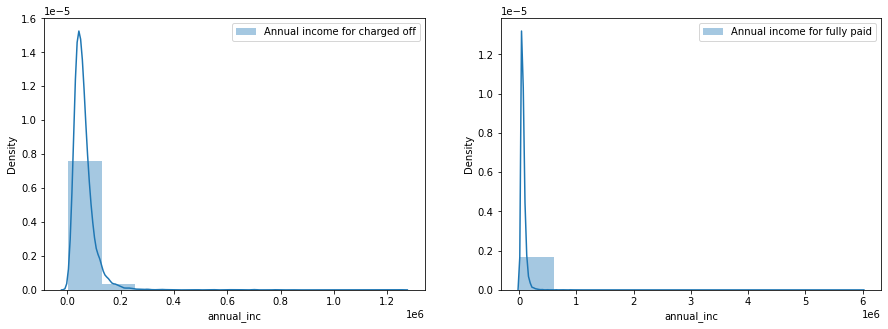

In [76]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df_loan[(df_loan['loan_status']==0)]['annual_inc'],label='Annual income for charged off', bins=10)
plt.legend()
plt.subplot(1,2,2)
sns.distplot(df_loan[(df_loan['loan_status']==1)]['annual_inc'],label='Annual income for fully paid', bins=10)
plt.legend()

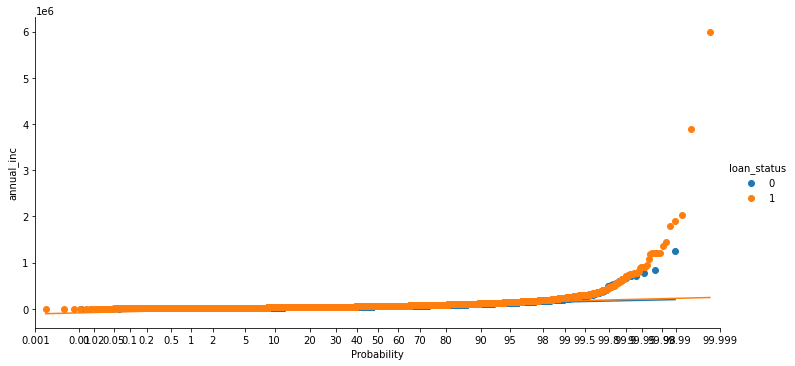

In [77]:
fg = (sns.FacetGrid(df_loan, hue='loan_status', height=5, aspect=2)
        .map(probscale.probplot, 'annual_inc', bestfit=True)
        .set_axis_labels(x_var='Probability', y_var='annual_inc')
        .add_legend())

Im wyższe zarobki tym wieksze prawdopodobieństwo spłaty pożyczki, jednak prawdopodobieństwo to rośnie znacznie dopiero dla wysokich wpływów.

### Zmienna staż pracy (emp_length)

In [78]:
print('Range of values: ', df_loan['emp_length'].max()-df_loan['emp_length'].min())

Range of values:  9


In [79]:
print('Minimum emp_length: ', df_loan['emp_length'].min())
print('Maximum emp_length: ',df_loan['emp_length'].max())
print('Mean value: ', df_loan['emp_length'].mean())
print('Median value: ',df_loan['emp_length'].median())
print('Standard deviation: ', df_loan['emp_length'].std())
print('Null values: ',df_loan['emp_length'].isnull().any())

Minimum emp_length:  1
Maximum emp_length:  10
Mean value:  5.225883476599809
Median value:  5.0
Standard deviation:  3.4553435283596534
Null values:  False


In [80]:
Q1=df_loan['emp_length'].quantile(q=0.25)
Q3=df_loan['emp_length'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df_loan['emp_length']))

1st Quartile (Q1) is:  2.0
3st Quartile (Q3) is:  10.0
Interquartile range (IQR) is  8.0


In [81]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in emp_length: ', L_outliers)
print('Upper outliers in emp_length: ', U_outliers)

Lower outliers in emp_length:  -10.0
Upper outliers in emp_length:  22.0


In [82]:
print('Number of outliers in emp_length upper : ', df_loan[df_loan['emp_length']>22.0]['emp_length'].count())
print('Number of outliers in emp_length lower : ', df_loan[df_loan['emp_length']<-10.0]['emp_length'].count())
print('% of Outlier in emp_length upper: ',round(df_loan[df_loan['emp_length']>22.0]['emp_length'].count()*100/len(df_loan)), '%')
print('% of Outlier in emp_length lower: ',round(df_loan[df_loan['emp_length']<-10.0]['emp_length'].count()*100/len(df_loan)), '%')

Number of outliers in emp_length upper :  0
Number of outliers in emp_length lower :  0
% of Outlier in emp_length upper:  0 %
% of Outlier in emp_length lower:  0 %


C:\Users\iza\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


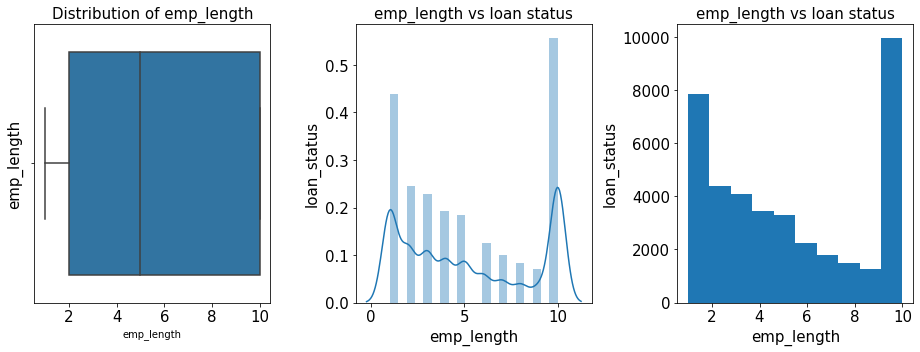

In [83]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

sns.boxplot(x='emp_length',data=df_loan,orient='v',ax=ax1)
ax1.set_ylabel('emp_length', fontsize=15)
ax1.set_title('Distribution of emp_length', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_loan['emp_length'],ax=ax2)
ax2.set_xlabel('emp_length', fontsize=15)
ax2.set_ylabel('loan_status', fontsize=15)
ax2.set_title('emp_length vs loan status', fontsize=15)
ax2.tick_params(labelsize=15)

ax3.hist(df_loan['emp_length'])
ax3.set_xlabel('emp_length', fontsize=15)
ax3.set_ylabel('loan_status', fontsize=15)
ax3.set_title('emp_length vs loan status', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


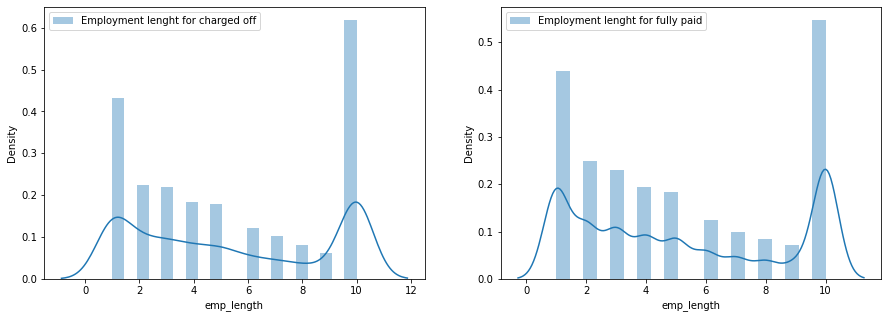

In [84]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df_loan[(df_loan['loan_status']==0)]['emp_length'],label='Employment lenght for charged off', bins=20)
plt.legend()
plt.subplot(1,2,2)
sns.distplot(df_loan[(df_loan['loan_status']==1)]['emp_length'],label='Employment lenght for fully paid', bins=20)
plt.legend()

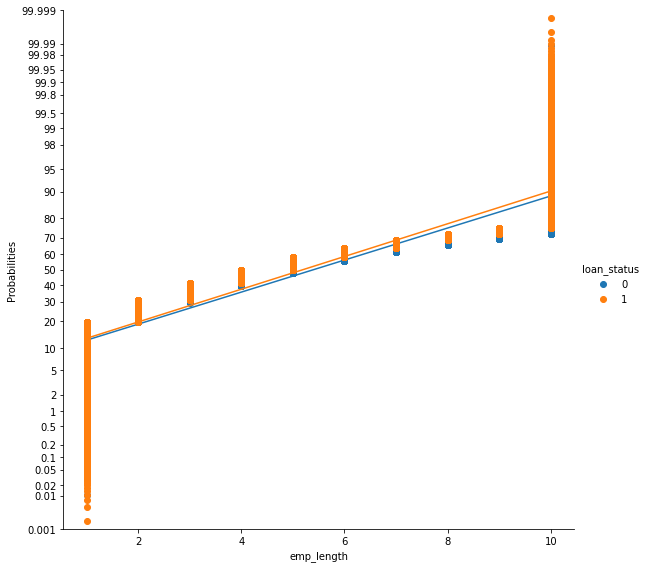

In [85]:
fg = (sns.FacetGrid(df_loan, hue='loan_status', height=8)
        .map(probscale.probplot, 'emp_length', probax='y', bestfit=True)
        .set_ylabels('Probabilities')
        .add_legend())

Największe prawdopodobieństwo niewypłacalności jest do ok 6 lat stażu pracy, potem prawdopodobieństwo to rośnie tylko nieznacznie. 

### Zmienna wysokość pożyczki (loan_amnt)

In [86]:
print('Range of values: ', df_loan['loan_amnt'].max()-df_loan['loan_amnt'].min())

Range of values:  34500.0


In [87]:
print('Minimum loan_amnt: ', df_loan['loan_amnt'].min())
print('Maximum loan_amnt: ',df_loan['loan_amnt'].max())
print('Mean value: ', df_loan['loan_amnt'].mean())
print('Median value: ',df_loan['loan_amnt'].median())
print('Standard deviation: ', df_loan['loan_amnt'].std())
print('Null values: ',df_loan['loan_amnt'].isnull().any())

Minimum loan_amnt:  500.0
Maximum loan_amnt:  35000.0
Mean value:  11231.360277484542
Median value:  10000.0
Standard deviation:  7464.54283214269
Null values:  False


In [88]:
Q1=df_loan['loan_amnt'].quantile(q=0.25)
Q3=df_loan['loan_amnt'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df_loan['loan_amnt']))

1st Quartile (Q1) is:  5500.0
3st Quartile (Q3) is:  15000.0
Interquartile range (IQR) is  9500.0


In [89]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in loan_amnt: ', L_outliers)
print('Upper outliers in loan_amnt: ', U_outliers)

Lower outliers in loan_amnt:  -8750.0
Upper outliers in loan_amnt:  29250.0


In [90]:
print('Number of outliers in loan_amnt upper : ', df_loan[df_loan['loan_amnt']>29250.0]['loan_amnt'].count())
print('Number of outliers in loan_amnt lower : ', df_loan[df_loan['loan_amnt']<-8750.0]['loan_amnt'].count())
print('% of Outlier in loan_amnt upper: ',round(df_loan[df_loan['loan_amnt']>29250.0]['loan_amnt'].count()*100/len(df_loan)), '%')
print('% of Outlier in loan_amnt lower: ',round(df_loan[df_loan['loan_amnt']<-8750.0]['loan_amnt'].count()*100/len(df_loan)), '%')

Number of outliers in loan_amnt upper :  1239
Number of outliers in loan_amnt lower :  0
% of Outlier in loan_amnt upper:  3 %
% of Outlier in loan_amnt lower:  0 %


C:\Users\iza\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


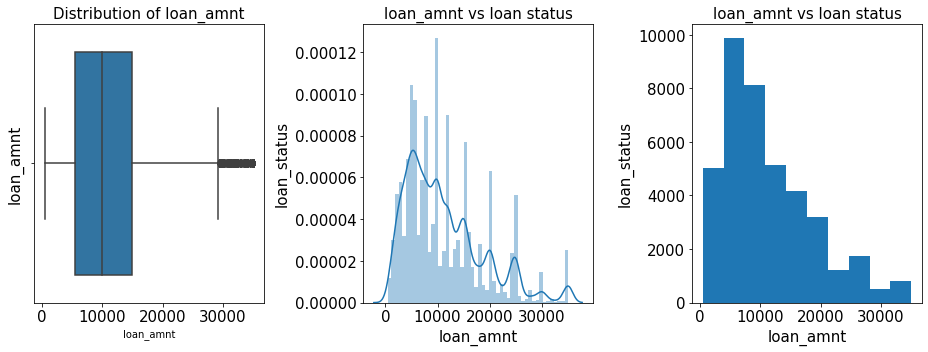

In [91]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

sns.boxplot(x='loan_amnt',data=df_loan,orient='v',ax=ax1)
ax1.set_ylabel('loan_amnt', fontsize=15)
ax1.set_title('Distribution of loan_amnt', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_loan['loan_amnt'],ax=ax2)
ax2.set_xlabel('loan_amnt', fontsize=15)
ax2.set_ylabel('loan_status', fontsize=15)
ax2.set_title('loan_amnt vs loan status', fontsize=15)
ax2.tick_params(labelsize=15)

ax3.hist(df_loan['loan_amnt'])
ax3.set_xlabel('loan_amnt', fontsize=15)
ax3.set_ylabel('loan_status', fontsize=15)
ax3.set_title('loan_amnt vs loan status', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


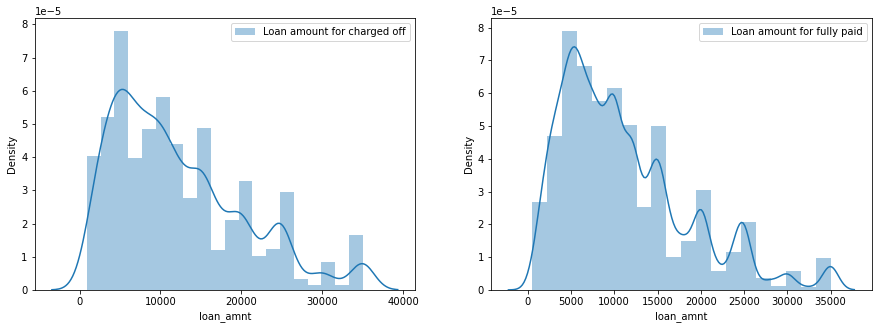

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df_loan[(df_loan['loan_status']==0)]['loan_amnt'],label='Loan amount for charged off', bins=20)
plt.legend()
plt.subplot(1,2,2)
sns.distplot(df_loan[(df_loan['loan_status']==1)]['loan_amnt'],label='Loan amount for fully paid', bins=20)
plt.legend()

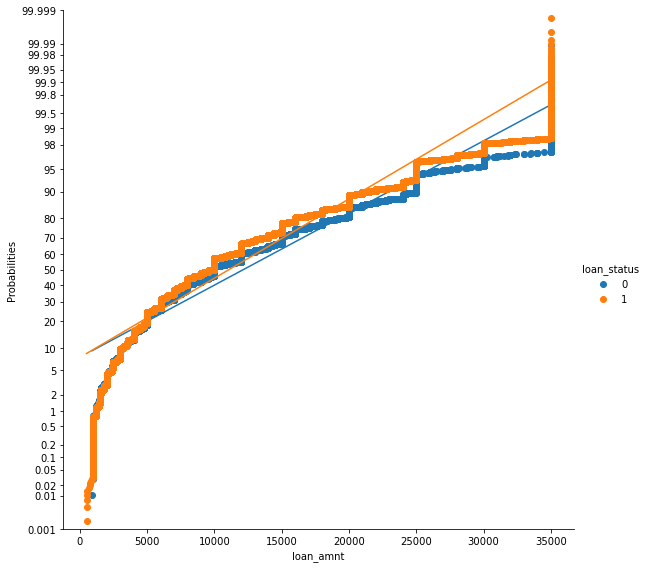

In [93]:
fg = (sns.FacetGrid(df_loan, hue='loan_status', height=8)
        .map(probscale.probplot, 'loan_amnt', probax='y', bestfit=True)
        .set_ylabels('Probabilities')
        .add_legend())

Im wyższa kwota pożyczki, tym prawdopodobieństwo spłaty wzrasta. 

### Zmienna okres pożyczkowy (term_months)

In [94]:
print('Range of values: ', df_loan['term_months'].max()-df_loan['term_months'].min())

Range of values:  24


In [95]:
print('Minimum term_months: ', df_loan['term_months'].min())
print('Maximum term_months: ',df_loan['term_months'].max())
print('Mean value: ', df_loan['term_months'].mean())
print('Median value: ',df_loan['term_months'].median())
print('Standard deviation: ', df_loan['term_months'].std())
print('Null values: ',df_loan['term_months'].isnull().any())

Minimum term_months:  36
Maximum term_months:  60
Mean value:  42.448499472176145
Median value:  36.0
Standard deviation:  10.638782200114951
Null values:  False


In [96]:
Q1=df_loan['term_months'].quantile(q=0.25)
Q3=df_loan['term_months'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df_loan['term_months']))

1st Quartile (Q1) is:  36.0
3st Quartile (Q3) is:  60.0
Interquartile range (IQR) is  24.0


In [97]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in term_months: ', L_outliers)
print('Upper outliers in term_months: ', U_outliers)

Lower outliers in term_months:  0.0
Upper outliers in term_months:  96.0


In [98]:
print('Number of outliers in term_months upper : ', df_loan[df_loan['term_months']>96.0]['term_months'].count())
print('Number of outliers in term_months lower : ', df_loan[df_loan['term_months']<0.0]['term_months'].count())
print('% of Outlier in term_months upper: ',round(df_loan[df_loan['term_months']>96.0]['term_months'].count()*100/len(df_loan)), '%')
print('% of Outlier in term_months lower: ',round(df_loan[df_loan['term_months']<0.0]['term_months'].count()*100/len(df_loan)), '%')

Number of outliers in term_months upper :  0
Number of outliers in term_months lower :  0
% of Outlier in term_months upper:  0 %
% of Outlier in term_months lower:  0 %


C:\Users\iza\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


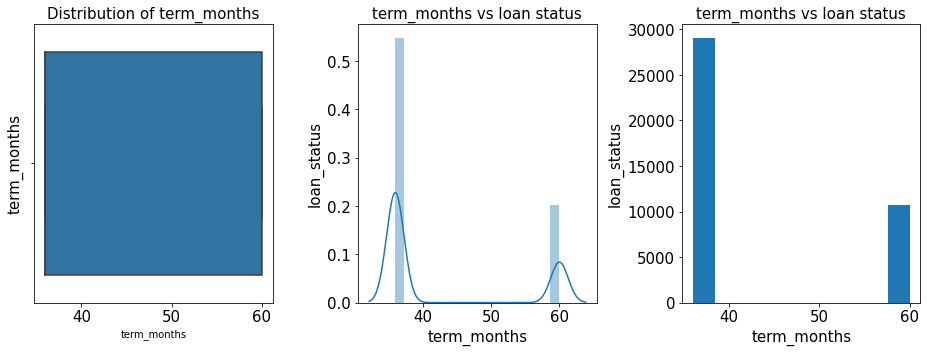

In [99]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

sns.boxplot(x='term_months',data=df_loan,orient='v',ax=ax1)
ax1.set_ylabel('term_months', fontsize=15)
ax1.set_title('Distribution of term_months', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(df_loan['term_months'],ax=ax2)
ax2.set_xlabel('term_months', fontsize=15)
ax2.set_ylabel('loan_status', fontsize=15)
ax2.set_title('term_months vs loan status', fontsize=15)
ax2.tick_params(labelsize=15)

ax3.hist(df_loan['term_months'])
ax3.set_xlabel('term_months', fontsize=15)
ax3.set_ylabel('loan_status', fontsize=15)
ax3.set_title('term_months vs loan status', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\iza\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


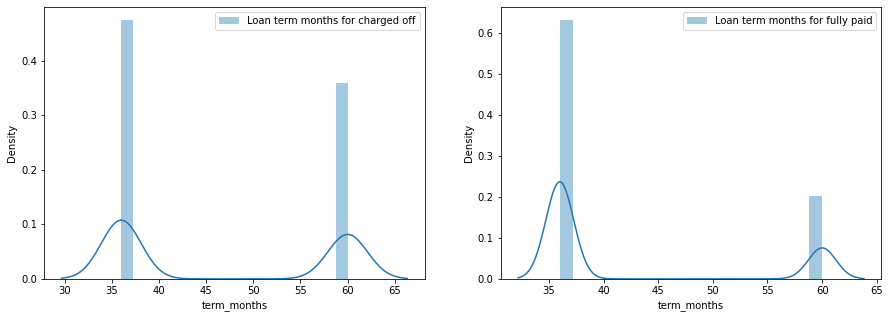

In [100]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df_loan[(df_loan['loan_status']==0)]['term_months'],label='Loan term months for charged off', bins=20)
plt.legend()
plt.subplot(1,2,2)
sns.distplot(df_loan[(df_loan['loan_status']==1)]['term_months'],label='Loan term months for fully paid', bins=20)
plt.legend()

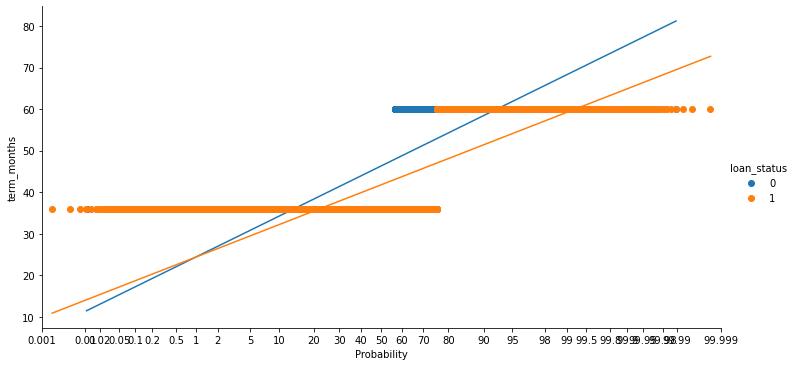

In [101]:
fg = (sns.FacetGrid(df_loan, hue='loan_status', height=5, aspect=2)
        .map(probscale.probplot, 'term_months', bestfit=True)
        .set_axis_labels(x_var='Probability', y_var='term_months')
        .add_legend())

Miejsze prawdopodobieństwo niewypłacalności jest w przypadku pożyczek na 5 lat.

# Klasteryzacja danych

In [102]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [103]:
X = df_loan.drop('loan_status',axis =1)  
y = df_loan['loan_status']

In [104]:
X.shape

(39786, 28)

In [105]:
y.size

39786

In [106]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,fico_range_low,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,term_months,cr_line_years
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000.0,5000.0,4975.0,162.87,10,1,24000.0,27.65,0.0,735,...,5000.00,863.16,0.00,0.0,0.00,171.62,739,735,36,36
1077430,2500.0,2500.0,2500.0,59.83,1,1,30000.0,1.00,0.0,740,...,456.46,435.17,0.00,122.9,1.11,119.66,499,0,60,22
1077175,2400.0,2400.0,2400.0,84.33,10,1,12252.0,8.72,0.0,735,...,2400.00,605.67,0.00,0.0,0.00,649.91,739,735,36,20
1076863,10000.0,10000.0,10000.0,339.31,10,1,49200.0,20.00,0.0,690,...,10000.00,2214.92,16.97,0.0,0.00,357.48,604,600,36,25
1075358,3000.0,3000.0,3000.0,67.79,1,1,80000.0,17.94,0.0,695,...,3000.00,1066.91,0.00,0.0,0.00,67.30,684,680,60,25


In [107]:
y.head()

id
1077501    1
1077430    0
1077175    1
1076863    1
1075358    1
Name: loan_status, dtype: int16

In [108]:
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X)

KMeans(max_iter=1000, n_clusters=5)

In [109]:
kmeans.labels_

array([3, 3, 3, ..., 1, 0, 3])

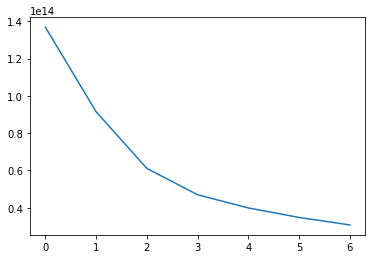

In [110]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)

In [111]:
range_n_clusters = [2, 3, 4, 5, 6]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.9296684452859785
For n_clusters=3, the silhouette score is 0.5849708024564747
For n_clusters=4, the silhouette score is 0.5174054648845609
For n_clusters=5, the silhouette score is 0.40960951026551196
For n_clusters=6, the silhouette score is 0.3537083838758707


### Optymalna liczba klastrów to 2. 

In [112]:
kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=42)
kmeans.fit(X)

KMeans(max_iter=1000, n_clusters=2, random_state=42)

In [113]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [114]:
df_loan['K-Means_Cluster_ID'] = kmeans.labels_

In [115]:
df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,term_months,cr_line_years,K-Means_Cluster_ID
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000.0,5000.0,4975.0,162.87,10,1,24000.0,1,27.65,0.0,...,863.16,0.00,0.0,0.00,171.62,739,735,36,36,0
1077430,2500.0,2500.0,2500.0,59.83,1,1,30000.0,0,1.00,0.0,...,435.17,0.00,122.9,1.11,119.66,499,0,60,22,0
1077175,2400.0,2400.0,2400.0,84.33,10,1,12252.0,1,8.72,0.0,...,605.67,0.00,0.0,0.00,649.91,739,735,36,20,0
1076863,10000.0,10000.0,10000.0,339.31,10,1,49200.0,1,20.00,0.0,...,2214.92,16.97,0.0,0.00,357.48,604,600,36,25,0
1075358,3000.0,3000.0,3000.0,67.79,1,1,80000.0,1,17.94,0.0,...,1066.91,0.00,0.0,0.00,67.30,684,680,60,25,0


<AxesSubplot:xlabel='K-Means_Cluster_ID', ylabel='last_fico_range_high'>

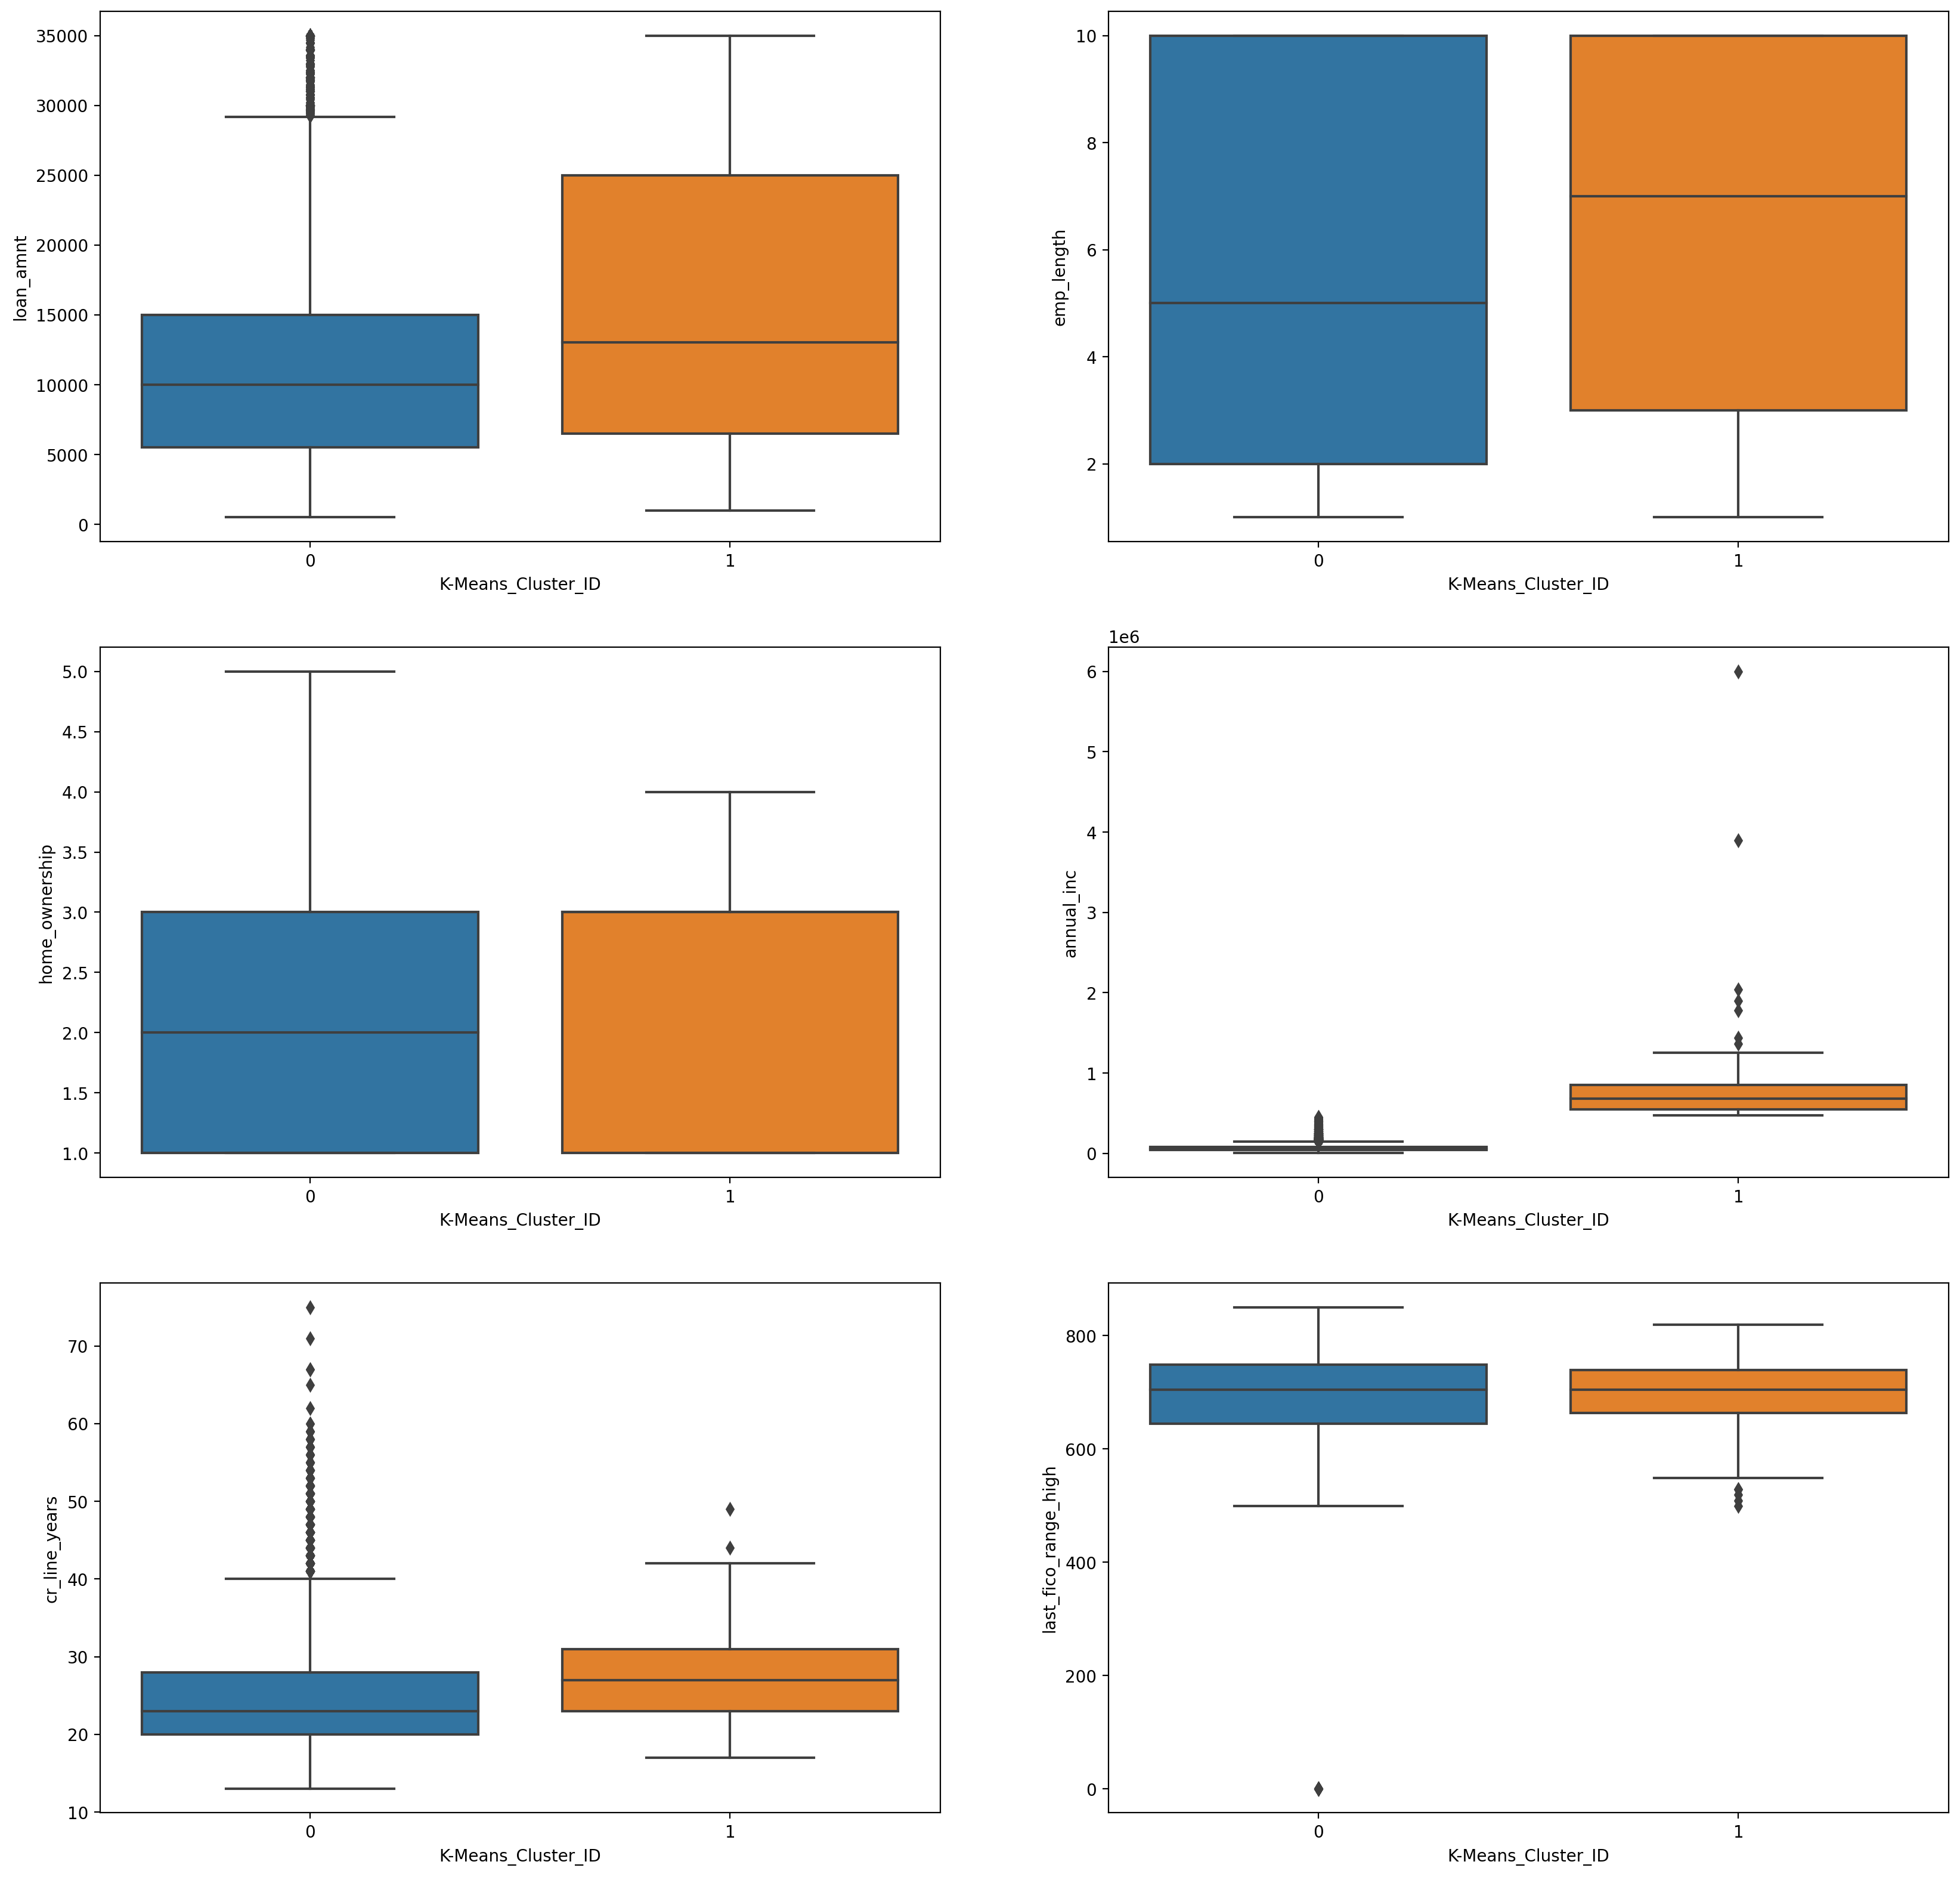

In [116]:
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,2,1)
sns.boxplot(x='K-Means_Cluster_ID', y='loan_amnt', data=df_loan)

plt.subplot(3,2,2)
sns.boxplot(x='K-Means_Cluster_ID', y='emp_length', data=df_loan)

plt.subplot(3,2,3)
sns.boxplot(x='K-Means_Cluster_ID', y='home_ownership', data=df_loan)

plt.subplot(3,2,4)
sns.boxplot(x='K-Means_Cluster_ID', y='annual_inc', data=df_loan)

plt.subplot(3,2,5)
sns.boxplot(x='K-Means_Cluster_ID', y='cr_line_years', data=df_loan)

plt.subplot(3,2,6)
sns.boxplot(x='K-Means_Cluster_ID', y='last_fico_range_high', data=df_loan)

## Modelowanie

In [117]:
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import confusion_matrix

In [118]:
df_loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'dti',
       'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'term_months', 'cr_line_years', 'K-Means_Cluster_ID'],
      dtype='object')

In [119]:
X = df_loan.drop(['loan_status'], axis=1)
y = df_loan['loan_status']

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [121]:
X_train.shape, X_test.shape

((31828, 29), (7958, 29))

In [122]:
y_train.size, y_test.size

(31828, 7958)

### Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
model_1 = LogisticRegression()
model_1.fit(X_train,y_train)
model_1.score(X_test,y_test)

C:\Users\iza\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9996230208595125

In [125]:
model_1_prediction = model_1.predict(X_test)

In [126]:
print(confusion_matrix(y_test, model_1_prediction))

[[1121    1]
 [   2 6834]]


In [127]:
AUROC_score_1 = metrics.roc_auc_score(model_1_prediction, y_test)
print("AUROC score dla modelu 1: {:.4f}".format(AUROC_score_1))

AUROC score dla modelu 1: 0.9990


### SVM

In [128]:
from sklearn.svm import SVC

In [129]:
model_2 = SVC()
model_2.fit(X_train,y_train)
model_2.score(X_test,y_test)

0.9752450364413169

In [130]:
model_2_prediction = model_2.predict(X_test)

In [131]:
print(confusion_matrix(y_test, model_2_prediction))

[[ 925  197]
 [   0 6836]]


In [132]:
AUROC_score_2 = metrics.roc_auc_score(model_2_prediction, y_test)
print("AUROC score dla modelu 2 : {:.4f}".format(AUROC_score_2))

AUROC score dla modelu 2 : 0.9860


## Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
model_3 = RandomForestClassifier()
model_3.fit(X_train, y_train)
model_3.score(X_test,y_test)

0.9987434028650415

In [135]:
model_3_prediction = model_3.predict(X_test)

In [136]:
print(confusion_matrix(y_test, model_3_prediction))

[[1112   10]
 [   0 6836]]


In [137]:
AUROC_score_3 = metrics.roc_auc_score(model_3_prediction, y_test)
print("AUROC score dla modelu 3 : {:.4f}".format(AUROC_score_3))

AUROC score dla modelu 3 : 0.9993


## Gradient boosting

In [138]:
from sklearn.ensemble import GradientBoostingClassifier

In [139]:
model_4= GradientBoostingClassifier()
model_4.fit(X_train, y_train)
model_4.score(X_test,y_test)

0.9982407640110581

In [140]:
model_4_prediction = model_4.predict(X_test)

In [141]:
print(confusion_matrix(y_test, model_4_prediction))

[[1114    8]
 [   6 6830]]


In [142]:
AUROC_score_4 = metrics.roc_auc_score(model_4_prediction, y_test)
print("AUROC score dla modelu 4 : {:.4f}".format(AUROC_score_4))

AUROC score dla modelu 4 : 0.9967


## XGBoost

In [143]:
#!pip3 install xgboost

In [144]:
import xgboost as xgb

In [145]:
model_5=xgb.XGBClassifier(use_label_encoder=False)
model_5.fit(X_train, y_train)
model_5.score(X_test,y_test)

[21:07:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9992460417190249

In [146]:
model_5_prediction = model_5.predict(X_test)

In [147]:
print(confusion_matrix(y_test, model_5_prediction))

[[1116    6]
 [   0 6836]]


In [148]:
AUROC_score_5 = metrics.roc_auc_score(model_5_prediction, y_test)
print("AUROC score dla modelu 5 : {:.4f}".format(AUROC_score_5))

AUROC score dla modelu 5 : 0.9996


In [149]:
print('Feature importances: \n',pd.DataFrame(model_5.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                               Imp
loan_amnt                0.000632
funded_amnt              0.000985
funded_amnt_inv          0.000823
installment              0.000669
emp_length               0.000295
home_ownership           0.000146
annual_inc               0.000767
dti                      0.000309
delinq_2yrs              0.000000
fico_range_low           0.000855
fico_range_high          0.000000
inq_last_6mths           0.000158
open_acc                 0.000562
pub_rec                  0.001228
revol_bal                0.000119
total_acc                0.000745
total_pymnt              0.001731
total_pymnt_inv          0.000949
total_rec_prncp          0.002091
total_rec_int            0.001155
total_rec_late_fee       0.000932
recoveries               0.982078
collection_recovery_fee  0.000000
last_pymnt_amnt          0.001071
last_fico_range_high     0.000976
last_fico_range_low      0.000000
term_months              0.000336
cr_line_years            

### Porównianie modeli

In [150]:
prediction_data={'Model':['Logistic Regression',
                          'SVM',
                          'Random Forest',
                          'Gradient boosting',
                          'XGBoost'
                         ],
                   'AUROC score':[AUROC_score_1,
                              AUROC_score_2,
                              AUROC_score_3,
                              AUROC_score_4,
                              AUROC_score_5]
                    }
 
prediction_table = pd.DataFrame(prediction_data)
prediction_table

,Model,AUROC score
0,Logistic Regression,0.999036
1,SVM,0.985995
2,Random Forest,0.999270
3,Gradient boosting,0.996736
4,XGBoost,0.999562


# PCA

In [151]:
## Feature scaling
cols = X_train.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [152]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [153]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [154]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,emp_length,home_ownership,annual_inc,dti,delinq_2yrs,fico_range_low,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,term_months,cr_line_years,K-Means_Cluster_ID
0,-0.379179,-0.355919,-0.295685,-0.636907,1.384024,1.063799,-0.025380,-1.106617,-0.299691,0.422215,...,-0.535816,-0.188342,-0.136828,-0.085443,1.100697,0.583601,0.470278,1.640053,1.697211,-0.044179
1,1.718316,1.815948,1.903284,2.044167,-0.931571,1.063799,0.393177,0.284072,-0.299691,0.981706,...,-0.580034,-0.188342,-0.136828,-0.085443,4.317518,1.021565,0.769693,-0.609736,-0.796686,-0.044179
2,0.642677,0.702170,0.784510,1.170159,-1.221020,1.063799,0.680170,0.579612,-0.299691,-1.396129,...,0.832249,-0.188342,-0.136828,-0.085443,-0.475057,0.458469,0.384732,-0.609736,-0.209887,-0.044179
3,-1.105235,-1.107720,-1.039197,-1.107870,0.515676,1.063799,0.559270,-1.126120,-0.299691,0.142470,...,-0.728369,-0.188342,-0.136828,-0.085443,-0.584293,1.396962,1.026334,-0.609736,-0.063187,-0.044179
4,-1.306917,-1.316553,-1.249624,-1.335970,-0.063223,1.063799,27.657526,-1.915226,-0.299691,0.562088,...,-0.841414,-0.188342,-0.136828,-0.085443,-0.336868,0.083072,0.128091,-0.609736,2.284011,22.635257


<AxesSubplot:xlabel='None', ylabel='None'>

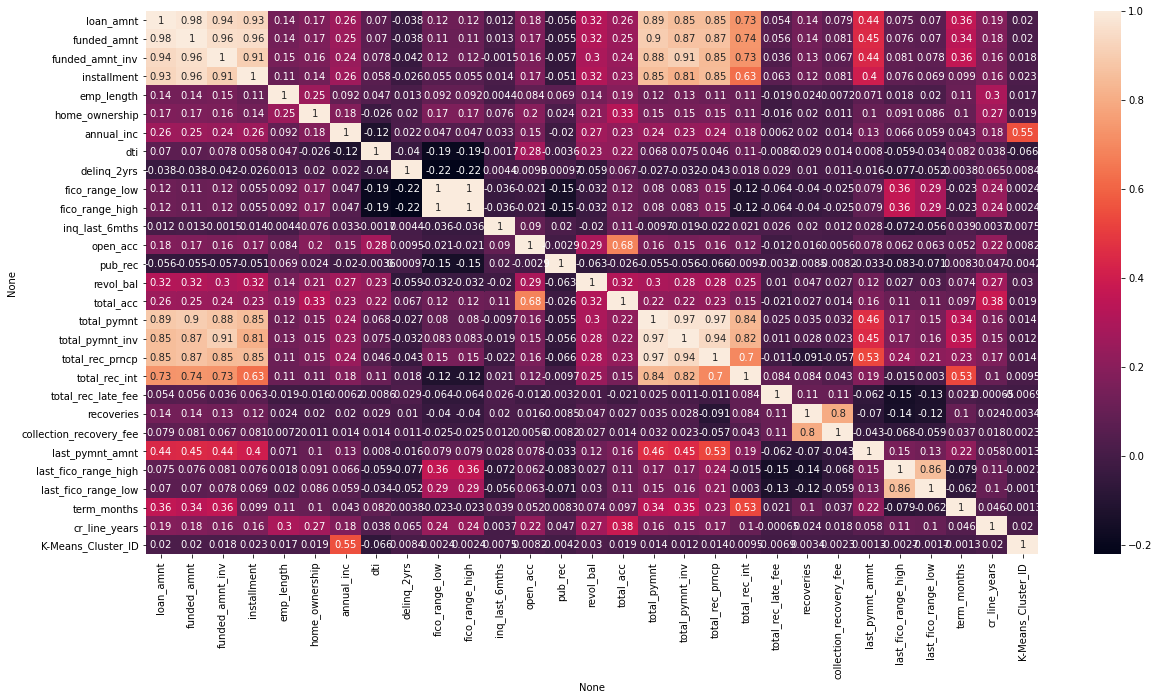

In [155]:
plt.figure(figsize = (20,10))       
sns.heatmap(X_train.corr(),annot = True)

In [156]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [157]:
pca.components_[0]

array([ 0.33655637,  0.33980136,  0.33503667,  0.31920007,  0.0695435 ,
        0.08736312,  0.11376906,  0.03571052, -0.01416034,  0.05227044,
        0.05227044,  0.00449746,  0.09235757, -0.02420387,  0.13917956,
        0.12557224,  0.33923944,  0.33389557,  0.32943275,  0.2789376 ,
        0.00997441,  0.02992436,  0.01979087,  0.17870639,  0.06291813,
        0.05935931,  0.13377603,  0.09283946,  0.01665293])

In [158]:
pca.explained_variance_ratio_

array([2.74360968e-01, 1.00950583e-01, 7.66189458e-02, 6.42218721e-02,
       5.34991993e-02, 4.82722350e-02, 4.10451714e-02, 3.68089873e-02,
       3.60534558e-02, 3.41059233e-02, 3.25087619e-02, 2.95865953e-02,
       2.72522781e-02, 2.66129308e-02, 2.38777165e-02, 2.21426408e-02,
       1.86405090e-02, 1.22918659e-02, 1.19719162e-02, 9.45889160e-03,
       6.28334804e-03, 4.80203614e-03, 4.01388171e-03, 3.18942501e-03,
       9.94029709e-04, 3.44360537e-04, 9.14720003e-05, 1.71960589e-15,
       2.15102989e-33])

In [159]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.27436097, 0.37531155, 0.4519305 , 0.51615237, 0.56965157,
       0.6179238 , 0.65896897, 0.69577796, 0.73183142, 0.76593734,
       0.7984461 , 0.8280327 , 0.85528498, 0.88189791, 0.90577562,
       0.92791826, 0.94655877, 0.95885064, 0.97082256, 0.98028145,
       0.98656479, 0.99136683, 0.99538071, 0.99857014, 0.99956417,
       0.99990853, 1.        , 1.        , 1.        ])

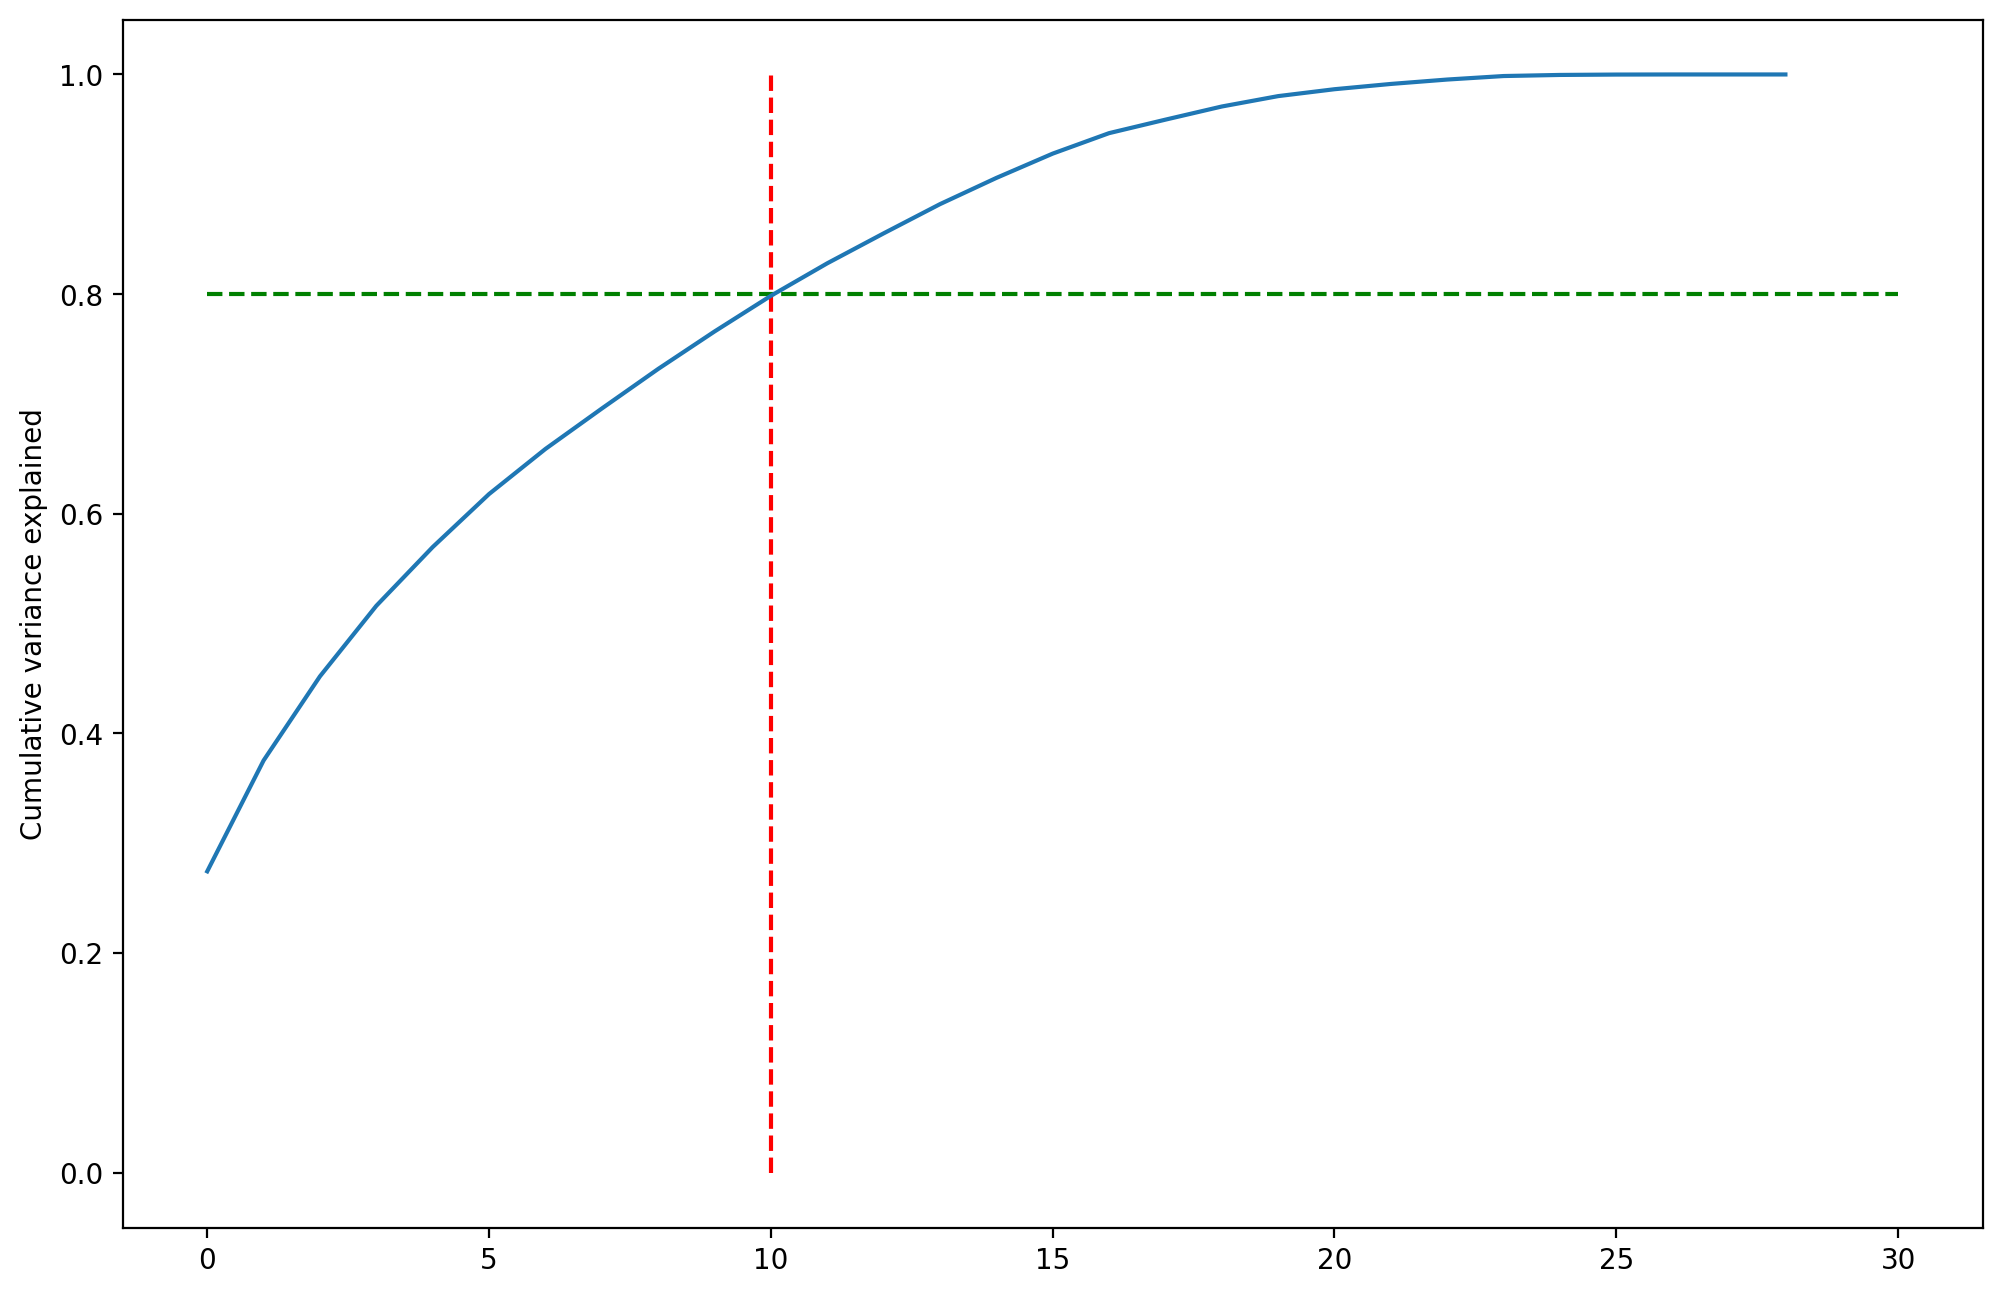

In [160]:
fig = plt.figure(figsize=[12,8],dpi=200)
plt.vlines(x=10, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.80, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

10 komponentów wyjaśni model w 80%.

In [161]:
pca = PCA(n_components = 10)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

### Logistic Regression after PCA

In [162]:
model_1_PCA = LogisticRegression()
model_1_PCA.fit(X_train_PCA,y_train)
model_1_PCA.score(X_test_PCA,y_test)

0.9498617743151546

In [163]:
model_1_prediction_PCA = model_1_PCA.predict(X_test_PCA)

In [164]:
print(confusion_matrix(y_test, model_1_prediction_PCA))

[[ 816  306]
 [  93 6743]]


In [165]:
AUROC_score_1_PCA = metrics.roc_auc_score(model_1_prediction_PCA, y_test)
print("AUROC score dla modelu 1 po PCA : {:.4f}".format(AUROC_score_1_PCA))

AUROC score dla modelu 1 po PCA : 0.9271


### SVM after PCA

In [166]:
model_2_PCA = SVC()
model_2_PCA.fit(X_train_PCA,y_train)
model_2_PCA.score(X_test_PCA,y_test)

0.9581553154058808

In [167]:
model_2_prediction_PCA = model_2_PCA.predict(X_test_PCA)

In [168]:
print(confusion_matrix(y_test, model_2_prediction_PCA))

[[ 840  282]
 [  51 6785]]


In [169]:
AUROC_score_2_PCA = metrics.roc_auc_score(model_2_prediction_PCA, y_test)
print("AUROC score dla modelu 2 po PCA : {:.4f}".format(AUROC_score_2_PCA))

AUROC score dla modelu 2 po PCA : 0.9514


### Random Forest after PCA

In [170]:
model_3_PCA = RandomForestClassifier()
model_3_PCA.fit(X_train_PCA, y_train)
model_3_PCA.score(X_test_PCA,y_test)

0.9303845187232973

In [171]:
model_3_prediction_PCA = model_3_PCA.predict(X_test_PCA)

In [172]:
print(confusion_matrix(y_test, model_3_prediction_PCA))

[[ 686  436]
 [ 118 6718]]


In [173]:
AUROC_score_3_PCA = metrics.roc_auc_score(model_3_prediction_PCA, y_test)
print("AUROC score dla modelu 3 po PCA : {:.4f}".format(AUROC_score_3_PCA))

AUROC score dla modelu 3 po PCA : 0.8961


### Gradient boosting after PCA

In [174]:
model_4= GradientBoostingClassifier()
model_4.fit(X_train_PCA, y_train)
model_4.score(X_test_PCA,y_test)

0.9249811510429756

In [175]:
model_4_prediction_PCA = model_4.predict(X_test_PCA)

In [176]:
print(confusion_matrix(y_test, model_4_prediction_PCA))

[[ 652  470]
 [ 127 6709]]


In [177]:
AUROC_score_4_PCA = metrics.roc_auc_score(model_4_prediction_PCA, y_test)
print("AUROC score dla modelu 4 po PCA : {:.4f}".format(AUROC_score_4_PCA))

AUROC score dla modelu 4 po PCA : 0.8858


### XGBoost after PCA

In [178]:
model_5_PCA=xgb.XGBClassifier(use_label_encoder=False)
model_5_PCA.fit(X_train_PCA, y_train)
model_5_PCA.score(X_test_PCA,y_test)

[21:08:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9479768786127167

In [179]:
model_5_prediction_PCA = model_5_PCA.predict(X_test_PCA)

In [180]:
print(confusion_matrix(y_test, model_5_prediction_PCA))

[[ 822  300]
 [ 114 6722]]


In [181]:
AUROC_score_5_PCA = metrics.roc_auc_score(model_5_prediction_PCA, y_test)
print("AUROC score dla modelu 5 po PCA  : {:.4f}".format(AUROC_score_5_PCA))

AUROC score dla modelu 5 po PCA  : 0.9177


### Podsumowanie wyników modeli

In [182]:
temp_predictions=pd.DataFrame({'Model':['Logistic Regression after PCA',
                          'SVM after PCA',
                          'Random Forest after PCA',
                          'Gradient boosting after PCA',
                          'XGBoost after PCA'
                         ],
                   'AUROC score':[AUROC_score_1_PCA,
                              AUROC_score_2_PCA,
                              AUROC_score_3_PCA,
                              AUROC_score_4_PCA,
                              AUROC_score_5_PCA]
                    })

prediction_table = pd.concat([prediction_table, temp_predictions], ignore_index= "True")
prediction_table

,Model,AUROC score
0,Logistic Regression,0.999036
1,SVM,0.985995
2,Random Forest,0.999270
3,Gradient boosting,0.996736
4,XGBoost,0.999562
5,Logistic Regression after PCA,0.927140
6,SVM after PCA,0.951429
7,Random Forest after PCA,0.896144
8,Gradient boosting after PCA,0.885751
9,XGBoost after PCA,0.917741


Redukcja wymiarów nie wpłynęła korzystnie na wytrenowanie modeli. Najwyższy AUROC score jest dla modelu XGBoost. 

In [183]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [184]:
# K fold cross-validation
num_folds = 20
seed = 77
kfold = KFold(n_splits=num_folds)
crossval_score = cross_val_score(model_5, X, y, cv=kfold)
proba = cross_val_predict(model_5, X, y, cv=kfold, method='predict_proba')[:,1]
accuracy=np.mean(abs(crossval_score))
print('Average accuracy: ',accuracy)

[21:08:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:09:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:09:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel